<a href="https://colab.research.google.com/github/slneha/reveal-ai-lens/blob/main/XAI_Project_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mahdimaktabdar/chatgpt-classification-dataset
!kaggle datasets download -d heleneeriksen/gpt-vs-human-a-corpus-of-research-abstracts

Dataset URL: https://www.kaggle.com/datasets/mahdimaktabdar/chatgpt-classification-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/702k [00:00<?, ?B/s]
100% 702k/702k [00:00<00:00, 955MB/s]
Dataset URL: https://www.kaggle.com/datasets/heleneeriksen/gpt-vs-human-a-corpus-of-research-abstracts
License(s): other
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 217MB/s]


In [4]:
!unzip gpt-vs-human-a-corpus-of-research-abstracts.zip
!unzip chatgpt-classification-dataset.zip

Archive:  gpt-vs-human-a-corpus-of-research-abstracts.zip
  inflating: data_set.csv            
Archive:  chatgpt-classification-dataset.zip
  inflating: article_level_data.csv  
  inflating: sentence_level_data.csv  


In [72]:
import pandas as pd

df_final = pd.DataFrame(columns=['AI_text', 'Human_text', 'MetaData'])

In [73]:
from datasets import load_dataset

dataset = load_dataset("NicolaiSivesind/ChatGPT-Research-Abstracts")


In [74]:
df1 = pd.DataFrame(dataset['train'])
df1

,title,real_abstract,real_word_count,generated_abstract,generated_word_count
0,Deterministics descriptions of the turbulence ...,This PhD thesis is devoted to deterministic st...,594,The Navier-Stokes equations provide a fundamen...,455
1,Clustering with phylogenetic tools in astrophy...,Phylogenetic approaches are finding more and m...,593,Clustering is a widely used technique in astro...,382
2,Infer\^encia Baseada em Magnitudes na investig...,Research in Sports Sciences is supported often...,251,The use of null hypothesis significance testin...,349
3,Boxicity and Poset Dimension,"Let $G$ be a simple, undirected, finite graph ...",577,Boxicity and Poset Dimension are two closely r...,380
4,Formation {\`a} distance et outils num{\'e}riq...,This second part of a 2 volume-expertise is ma...,570,This research paper explores the potential of ...,410
...,...,...,...,...,...
9995,Kink in superconducting cosmic string: exact s...,We solve the equations of motion and find the ...,50,We present an exact solution for a kink config...,46
9996,Singularities of Mean Curvature Flow of Surfac...,In this paper we study the blow up sequence of...,50,This research paper discusses the behavior of ...,45
9997,Is small-world network disordered?,Recent renormalization group results predict n...,50,Small-world networks are ubiquitous and exhibi...,55
9998,The Asteroseismology Metacomputer,We have developed a specialized computational ...,50,The Asteroseismology Metacomputer is a computa...,37


In [75]:
df1.drop(['real_word_count','generated_word_count'], axis=1, inplace=True)
df1

,title,real_abstract,generated_abstract
0,Deterministics descriptions of the turbulence ...,This PhD thesis is devoted to deterministic st...,The Navier-Stokes equations provide a fundamen...
1,Clustering with phylogenetic tools in astrophy...,Phylogenetic approaches are finding more and m...,Clustering is a widely used technique in astro...
2,Infer\^encia Baseada em Magnitudes na investig...,Research in Sports Sciences is supported often...,The use of null hypothesis significance testin...
3,Boxicity and Poset Dimension,"Let $G$ be a simple, undirected, finite graph ...",Boxicity and Poset Dimension are two closely r...
4,Formation {\`a} distance et outils num{\'e}riq...,This second part of a 2 volume-expertise is ma...,This research paper explores the potential of ...
...,...,...,...
9995,Kink in superconducting cosmic string: exact s...,We solve the equations of motion and find the ...,We present an exact solution for a kink config...
9996,Singularities of Mean Curvature Flow of Surfac...,In this paper we study the blow up sequence of...,This research paper discusses the behavior of ...
9997,Is small-world network disordered?,Recent renormalization group results predict n...,Small-world networks are ubiquitous and exhibi...
9998,The Asteroseismology Metacomputer,We have developed a specialized computational ...,The Asteroseismology Metacomputer is a computa...


In [76]:
to_append = pd.DataFrame({
    "AI_text": df1["generated_abstract"],
    "Human_text": df1["real_abstract"],
    "MetaData": df1["title"]
})

df_final = pd.concat([df_final, to_append], ignore_index=True)
df_final

,AI_text,Human_text,MetaData
0,The Navier-Stokes equations provide a fundamen...,This PhD thesis is devoted to deterministic st...,Deterministics descriptions of the turbulence ...
1,Clustering is a widely used technique in astro...,Phylogenetic approaches are finding more and m...,Clustering with phylogenetic tools in astrophy...
2,The use of null hypothesis significance testin...,Research in Sports Sciences is supported often...,Infer\^encia Baseada em Magnitudes na investig...
3,Boxicity and Poset Dimension are two closely r...,"Let $G$ be a simple, undirected, finite graph ...",Boxicity and Poset Dimension
4,This research paper explores the potential of ...,This second part of a 2 volume-expertise is ma...,Formation {\`a} distance et outils num{\'e}riq...
...,...,...,...
9995,We present an exact solution for a kink config...,We solve the equations of motion and find the ...,Kink in superconducting cosmic string: exact s...
9996,This research paper discusses the behavior of ...,In this paper we study the blow up sequence of...,Singularities of Mean Curvature Flow of Surfac...
9997,Small-world networks are ubiquitous and exhibi...,Recent renormalization group results predict n...,Is small-world network disordered?
9998,The Asteroseismology Metacomputer is a computa...,We have developed a specialized computational ...,The Asteroseismology Metacomputer


In [77]:
# downloaded separately due to compatibility issues
df3=pd.read_csv('hc3_dataset.csv')
df3.head()


,id,question,human_answers,chatgpt_answers,source
0,0,"Why is every book I hear about a "" NY Times # ...","['Basically there are many categories of "" Bes...",['There are many different best seller lists t...,reddit_eli5
1,1,"If salt is so bad for cars , why do we use it ...",['salt is good for not dying in car crashes an...,"[""Salt is used on roads to help melt ice and s...",reddit_eli5
2,2,Why do we still have SD TV channels when HD lo...,"[""The way it works is that old TV stations got...","[""There are a few reasons why we still have SD...",reddit_eli5
3,3,Why has nobody assassinated Kim Jong - un He i...,"[""You ca n't just go around assassinating the ...",['It is generally not acceptable or ethical to...,reddit_eli5
4,4,How was airplane technology able to advance so...,['Wanting to kill the shit out of Germans driv...,['After the Wright Brothers made the first pow...,reddit_eli5


In [78]:
df4=pd.read_csv('data_set.csv')
df4

,title,abstract,ai_generated,is_ai_generated
0,Are Advanced Potentials Anomalous?,Advanced electromagnetic potentials are indi...,False,0
1,Are Advanced Potentials Anomalous?,This research paper investigates the question ...,True,1
2,An efficient centralized binary multicast netw...,We give an algorithm for finding network enc...,False,0
3,An efficient centralized binary multicast netw...,The paper presents an efficient centralized bi...,True,1
4,Percolation transition in networks with degree...,We introduce an exponential random graph mod...,False,0
...,...,...,...,...
4048,Vortex Dynamics at the Initial Stage of Resist...,This research paper investigates the vortex dy...,True,1
4049,The Veldkamp Space of Two-Qubits,Given a remarkable representation of the gen...,False,0
4050,The Veldkamp Space of Two-Qubits,The Veldkamp space of two-qubits is a mathemat...,True,1
4051,Fusion process studied with preequilibrium gia...,The equilibration of macroscopic degrees of ...,False,0


In [79]:
import pandas as pd

# df_abs: title, abstract, ai_generated (bool), is_ai_generated (0/1)

def make_pairs_from_repeated_rows(df_abs: pd.DataFrame) -> pd.DataFrame:
    rows = []

    for title, group in df_abs.groupby("title"):
        # AI row
        ai_rows = group[group["is_ai_generated"] == 1]
        human_rows = group[group["is_ai_generated"] == 0]

        if not ai_rows.empty and not human_rows.empty:
            ai_text = ai_rows["abstract"].iloc[0]
            human_text = human_rows["abstract"].iloc[0]
        else:
            continue

        rows.append({
            "AI_text": ai_text,
            "Human_text": human_text,
            "MetaData": title
        })

    return pd.DataFrame(rows)

df_pairs = make_pairs_from_repeated_rows(df4)
df_pairs

,AI_text,Human_text,MetaData
0,"The research paper titled ""Illusion of Control...",Human beings like to believe they are in con...,"""Illusion of control"" in Minority and Parrondo..."
1,This research paper explores (2+1)-Einstein sp...,The aim of this survey is to give an overvie...,(2+1)-Einstein spacetimes of finite type
2,"The research paper titled ""2D Path Solutions f...",An easily implementable path solution algori...,2D Path Solutions from a Single Layer Excitabl...
3,This research paper explores the use of 3.8-mi...,We report infrared photometry of the extraso...,3.8-Micron Photometry During the Secondary Ecl...
4,This research paper investigates the potential...,Efficient injection of spin-polarized electr...,35% magnetocurrent with spin transport through Si
...,...,...,...
1948,The d-wave pairing state is a well-known pheno...,In cuprate superconductors doping is believe...,d-Wave Pairing State in Terms of the Zhang-Ric...
1949,This research paper investigates the possibili...,I examine electron-phonon mediated supercond...,d-wave superconductivity from electron-phonon ...
1950,This research paper presents a k-dependent SU(...,We extend the SU(4) model [1-5] for high-Tc ...,k-dependent SU(4) model of high-temperature su...
1951,This research paper explores q-deformed spin f...,We numerically study Barrett-Crane models of...,q-Deformed spin foam models of quantum gravity


In [80]:

df_final = pd.concat([df_final, df_pairs], ignore_index=True)
df_final

,AI_text,Human_text,MetaData
0,The Navier-Stokes equations provide a fundamen...,This PhD thesis is devoted to deterministic st...,Deterministics descriptions of the turbulence ...
1,Clustering is a widely used technique in astro...,Phylogenetic approaches are finding more and m...,Clustering with phylogenetic tools in astrophy...
2,The use of null hypothesis significance testin...,Research in Sports Sciences is supported often...,Infer\^encia Baseada em Magnitudes na investig...
3,Boxicity and Poset Dimension are two closely r...,"Let $G$ be a simple, undirected, finite graph ...",Boxicity and Poset Dimension
4,This research paper explores the potential of ...,This second part of a 2 volume-expertise is ma...,Formation {\`a} distance et outils num{\'e}riq...
...,...,...,...
11948,The d-wave pairing state is a well-known pheno...,In cuprate superconductors doping is believe...,d-Wave Pairing State in Terms of the Zhang-Ric...
11949,This research paper investigates the possibili...,I examine electron-phonon mediated supercond...,d-wave superconductivity from electron-phonon ...
11950,This research paper presents a k-dependent SU(...,We extend the SU(4) model [1-5] for high-Tc ...,k-dependent SU(4) model of high-temperature su...
11951,This research paper explores q-deformed spin f...,We numerically study Barrett-Crane models of...,q-Deformed spin foam models of quantum gravity


#Finetuning Model

In [14]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1


In [15]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="andreas122001/roberta-mixed-detector")

config.json:   0%|          | 0.00/885 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cuda:0


In [16]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("andreas122001/roberta-mixed-detector")
model = AutoModelForSequenceClassification.from_pretrained("andreas122001/roberta-mixed-detector")

In [81]:
import pandas as pd

rows = []
for idx, row in df_final.iterrows():
    pair_id = idx

    # AI row
    if pd.notna(row["AI_text"]):
        rows.append({
            "text": row["AI_text"],
            "label": 1,
            "Metadata": row["MetaData"],
            "pair_id": pair_id
        })

    # Human row
    if pd.notna(row["Human_text"]):
        rows.append({
            "text": row["Human_text"],
            "label": 0,
            "Metadata": row["MetaData"],
            "pair_id": pair_id
        })

df_train = pd.DataFrame(rows)
df_train.head()


,text,label,Metadata,pair_id
0,The Navier-Stokes equations provide a fundamen...,1,Deterministics descriptions of the turbulence ...,0
1,This PhD thesis is devoted to deterministic st...,0,Deterministics descriptions of the turbulence ...,0
2,Clustering is a widely used technique in astro...,1,Clustering with phylogenetic tools in astrophy...,1
3,Phylogenetic approaches are finding more and m...,0,Clustering with phylogenetic tools in astrophy...,1
4,The use of null hypothesis significance testin...,1,Infer\^encia Baseada em Magnitudes na investig...,2


In [18]:
model.config.id2label


{0: 'human-produced', 1: 'machine-generated'}

In [19]:
import torch
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_logits(texts, batch_size=16, max_length=512):
    all_logits = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        enc = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )
        enc = {k: v.to(device) for k, v in enc.items()}

        with torch.no_grad():
            outputs = model(**enc)
            logits = outputs.logits.cpu().numpy()

        all_logits.append(logits)

    return np.vstack(all_logits)


In [26]:
texts = df_train["text"].tolist()
true_labels = df_train["label"].to_numpy()  # 0 = human, 1 = machine

logits = predict_logits(texts, batch_size=16)
probs = torch.softmax(torch.tensor(logits), dim=-1).numpy()     # [:,0] = P(human), [:,1] = P(machine)
preds = probs.argmax(axis=1)                                     # same encoding as your labels

acc = accuracy_score(true_labels, preds)
print("Accuracy:", acc)

print("\nClassification Report:\n")
print(classification_report(true_labels, preds, target_names=["Human", "AI"]))


  0%|          | 0/1495 [00:00<?, ?it/s]

Accuracy: 0.8264034133690287

Classification Report:

              precision    recall  f1-score   support

       Human       1.00      0.66      0.79     11953
          AI       0.74      1.00      0.85     11953

    accuracy                           0.83     23906
   macro avg       0.87      0.83      0.82     23906
weighted avg       0.87      0.83      0.82     23906



Without any finetuning, this model highlights the baseline of the problem. While all text generated by artificial intelligence are accurately classified as machine-generated, 34% are inaccurately classified as AI.

In [20]:
def get_token_importance(text, target_class, max_length=256):
    """
    Returns tokens and importance scores for a single text
    target_class: 0 (human-produced) or 1 (machine-generated)
    """
    # Tokenize
    enc = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=max_length,
        padding=False,
    )
    input_ids = enc["input_ids"].to(device)       # [1, L]
    attention_mask = enc["attention_mask"].to(device)

    # Get input embeddings
    emb_layer = model.get_input_embeddings()
    input_embeds = emb_layer(input_ids)          # [1, L, H]
    input_embeds.retain_grad()

    # Forward with embeds
    model.zero_grad()
    outputs = model(inputs_embeds=input_embeds, attention_mask=attention_mask)
    logits = outputs.logits                      # [1, 2]
    logit = logits[0, target_class]

    # Backward
    logit.backward()

    # Gradients wrt embeddings
    grads = input_embeds.grad[0]                 # [L, H]
    # Importance = L2 norm over embedding dim
    token_importance = grads.norm(dim=-1).detach().cpu().numpy()

    # Convert ids to tokens
    token_ids = input_ids[0].detach().cpu().tolist()
    tokens = tokenizer.convert_ids_to_tokens(token_ids)

    return tokens, token_importance


In [21]:
def roberta_tokens_to_text(tokens):
    """Join RoBERTa tokens into a readable string with spaces."""
    words = []
    for tok in tokens:
        if tok.startswith("Ġ"):
            # new word
            words.append(tok[1:])
        elif tok in ["<s>", "</s>"]:
            continue
        else:
            # continuation of previous word (e.g., punctuation)
            if words:
                words[-1] = words[-1] + tok
            else:
                words.append(tok)
    return words

def build_colored_html(tokens, scores, target_class):
    """
    Build HTML string highlighting tokens.
    target_class: 1 => red (AI evidence), 0 => blue (Human evidence)
    """
    # Normalize scores to [0, 1]
    scores = np.array(scores)
    if scores.max() > 0:
        scores = scores / scores.max()
    else:
        scores = np.zeros_like(scores)

    # Map RoBERTa tokens → words
    words = roberta_tokens_to_text(tokens)
    # For simplicity, align scores to non-special tokens only
    # (filter out <s>, </s>, etc.)
    # We'll distribute scores across words in order.
    non_special_tokens = [
        t for t in tokens if t not in ["<s>", "</s>", tokenizer.pad_token]
    ]
    # Recompute normalized scores only on non-specials
    idxs = [i for i, t in enumerate(tokens) if t not in ["<s>", "</s>", tokenizer.pad_token]]
    word_scores = scores[idxs] if len(idxs) == len(words) else np.interp(
        np.linspace(0, len(scores)-1, num=len(words)), np.arange(len(scores)), scores
    )

    # Color: AI → red, Human → blue
    if target_class == 1:
        base_color = (255, 0, 0)   # red
        label_name = "AI evidence"
    else:
        base_color = (0, 0, 255)   # blue
        label_name = "Human evidence"

    html_parts = []
    for w, s in zip(words, word_scores):
        alpha = float(s)
        r, g, b = base_color
        style = f"background-color: rgba({r},{g},{b},{alpha:.2f}); padding:2px; margin:1px; border-radius:3px;"
        html_parts.append(f'<span style="{style}">{w}</span>')

    html_text = " ".join(html_parts)
    legend = f"<div><b>Highlight = {label_name} (strength by color intensity)</b></div>"
    return legend + "<div style='margin-top:4px;'>" + html_text + "</div>"


In [22]:
def explain_row(row_idx, max_length=256):
    row = df_train.iloc[row_idx]
    text = row["text"]
    target_class = row["label"]  # 0 = human-produced, 1 = machine-generated

    tokens, scores = get_token_importance(text, target_class, max_length=max_length)
    html = build_colored_html(tokens, scores, target_class)
    display(HTML(html))
    print("\nMetadata:", row.get("Metadata", ""))
    print("True label:", row["label"], "(0=Human, 1=AI)")


In [23]:
def explain_pair(pair_id, max_length=256):
    subset = df_train[df_train["pair_id"] == pair_id].copy()
    if subset.empty:
        print("❌ No rows for that pair_id:", pair_id)
        return

    # Sort so Human first (label 0), AI second (label 1), if both present
    subset = subset.sort_values("label")

    print(f"=== Pair {pair_id} ===")
    meta = subset["Metadata"].iloc[0] if "Metadata" in subset.columns else ""
    print("Metadata:", meta)
    print()

    for _, row in subset.iterrows():
        text = row["text"]
        target_class = row["label"]  # show evidence for its true class

        cls_name = "Human" if target_class == 0 else "AI"
        print(f"--- {cls_name} text (label={target_class}) ---")

        tokens, scores = get_token_importance(text, target_class, max_length=max_length)
        html = build_colored_html(tokens, scores, target_class)
        display(HTML(html))
        print()

    print("=====================================")


In [ ]:
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# If you don't already have this defined, re-define it:
def predict_logits(texts, batch_size=16, max_length=512):
    all_logits = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        enc = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )
        enc = {k: v.to(device) for k, v in enc.items()}

        with torch.no_grad():
            outputs = model(**enc)
            logits = outputs.logits.cpu().numpy()

        all_logits.append(logits)

    return np.vstack(all_logits)

# --- compute and store in df_train ---
texts = df_train["text"].tolist()
logits = predict_logits(texts, batch_size=16)
probs = torch.softmax(torch.tensor(logits), dim=-1).numpy()   # [:,0]=P(human), [:,1]=P(AI)

df_train["p_human"] = probs[:, 0]
df_train["p_ai"] = probs[:, 1]
df_train["pred"] = probs.argmax(axis=1)        # 0=human-produced, 1=machine-generated
df_train["correct"] = df_train["pred"] == df_train["label"]
df_train["margin"] = np.abs(df_train["p_ai"] - 0.5)  # distance from decision boundary


In [ ]:
# all pair_ids that have at least one misclassified text
mis_pairs = df_train.loc[~df_train["correct"], "pair_id"].unique()
print("Number of misclassified pairs:", len(mis_pairs))
print("Example misclassified pair_ids:", mis_pairs[:10])


Number of misclassified pairs: 4141
Example misclassified pair_ids: [ 2  7 10 12 18 19 25 28 29 30]


In [ ]:
from IPython.display import display, HTML


def explain_misclassified_pairs(n=5, max_length=256):
    """
    Explain the first n misclassified pairs using explain_pair.
    """
    if len(mis_pairs) == 0:
        print("No misclassified pairs found.")
        return

    for pair_id in mis_pairs[:n]:
        print("\n================ MISCLASSIFIED PAIR", pair_id, "================")
        # show some quick summary from df_train
        g = df_train[df_train["pair_id"] == pair_id]
        print("Metadata:", g["Metadata"].iloc[0] if "Metadata" in g.columns else "")
        print(g[["label", "pred", "p_human", "p_ai"]])

        # now call your existing visualization
        explain_pair(pair_id, max_length=max_length)


explain_misclassified_pairs(n=3)



================ MISCLASSIFIED PAIR 2 ================
Metadata: Infer\^encia Baseada em Magnitudes na investiga\c{c}\~ao em Ci\^encias do Esporte. A necessidade de romper com os testes de hip\'otese nula e os valores de p
   label  pred   p_human      p_ai
4      1     1  0.000072  0.999928
5      0     1  0.000209  0.999791
=== Pair 2 ===
Metadata: Infer\^encia Baseada em Magnitudes na investiga\c{c}\~ao em Ci\^encias do Esporte. A necessidade de romper com os testes de hip\'otese nula e os valores de p

--- Human text (label=0) ---



--- AI text (label=1) ---




================ MISCLASSIFIED PAIR 7 ================
Metadata: Stylolites: A review
    label  pred   p_human      p_ai
14      1     1  0.000114  0.999886
15      0     1  0.000208  0.999792
=== Pair 7 ===
Metadata: Stylolites: A review

--- Human text (label=0) ---



--- AI text (label=1) ---




================ MISCLASSIFIED PAIR 10 ================
Metadata: Formal Model of Uncertainty for Possibilistic Rules
    label  pred   p_human      p_ai
20      1     1  0.000071  0.999929
21      0     1  0.000328  0.999673
=== Pair 10 ===
Metadata: Formal Model of Uncertainty for Possibilistic Rules

--- Human text (label=0) ---



--- AI text (label=1) ---


#Moving On.. clustering similar embeddings to figure out which features impact the classification

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.util import ngrams  # if not installed: pip install nltk; nltk.download('punkt')

# ---------- Helper: clean tokens & scores together ----------
def clean_tokens_and_scores(tokens, scores, tokenizer):
    """
    Remove special tokens, strip Ġ prefix, drop empties.
    Keeps tokens and scores aligned.
    """
    specials = {"<s>", "</s>", tokenizer.pad_token}
    clean_toks = []
    clean_scores = []

    for t, s in zip(tokens, scores):
        if t in specials:
            continue
        if t.startswith("Ġ"):
            t = t[1:]
        t = t.strip()
        if not t:
            continue
        clean_toks.append(t)
        clean_scores.append(float(s))

    return clean_toks, np.array(clean_scores, dtype=float)


# ---------- Main: build n-gram saliency stats ----------
def build_ngram_saliency_stats(
    df,
    tokenizer,
    n=3,
    target_class=1,       # 1 = AI logit
    min_total_count=20,   # only keep n-grams seen at least this many times overall
):
    """
    df: df_train with columns ["text", "label"] where label 0=Human, 1=AI
    n: n-gram size (2, 3, etc.)
    Returns: df_ngrams with AI/Human saliency and bias.
    """
    ngram_scores_ai = defaultdict(list)
    ngram_scores_hum = defaultdict(list)

    for i, row in df.iterrows():
        text = row["text"]
        label = row["label"]  # 0 = human, 1 = ai

        # 1) Get token-level importance for AI logit
        tokens, scores = get_token_importance(text, target_class=target_class)

        # 2) Normalize scores per doc so they sum to 1
        scores = np.array(scores, dtype=float)
        if scores.sum() > 0:
            scores = scores / scores.sum()

        # 3) Clean tokens & scores together
        clean_toks, clean_scores = clean_tokens_and_scores(tokens, scores, tokenizer)

        # not enough tokens for n-grams
        if len(clean_toks) < n:
            continue

        # 4) Build n-grams and aggregate saliency over tokens in each n-gram
        #    We'll use a sliding window: score = sum of token saliencies in the window
        for idx in range(len(clean_toks) - n + 1):
            ng_tokens = clean_toks[idx:idx + n]
            ng_score = clean_scores[idx:idx + n].sum()
            ng = " ".join(ng_tokens)

            if label == 1:
                ngram_scores_ai[ng].append(float(ng_score))
            else:
                ngram_scores_hum[ng].append(float(ng_score))

    # 5) Aggregate into a DataFrame
    rows = []
    all_ngrams = set(ngram_scores_ai.keys()) | set(ngram_scores_hum.keys())

    for ng in all_ngrams:
        ai_vals = ngram_scores_ai.get(ng, [])
        hum_vals = ngram_scores_hum.get(ng, [])
        ai_count = len(ai_vals)
        hum_count = len(hum_vals)
        total_count = ai_count + hum_count

        if total_count < min_total_count:
            continue

        ai_mean = float(np.mean(ai_vals)) if ai_vals else 0.0
        hum_mean = float(np.mean(hum_vals)) if hum_vals else 0.0
        ai_bias = ai_mean - hum_mean

        rows.append(
            (ng, ai_mean, hum_mean, ai_bias, ai_count, hum_count, total_count)
        )

    df_ngrams = pd.DataFrame(
        rows,
        columns=[
            "ngram",
            "ai_saliency",
            "human_saliency",
            "ai_bias",
            "ai_count",
            "human_count",
            "total_count",
        ],
    )

    # Sort by how much more the n-gram is used as evidence for AI vs Human
    df_ngrams = df_ngrams.sort_values("ai_bias", ascending=False).reset_index(drop=True)
    return df_ngrams


# ---------- Run it ----------
# Example: 3-grams, AI vs Human
df_ngrams_3 = build_ngram_saliency_stats(
    df=df_train,
    tokenizer=tokenizer,
    n=3,
    target_class=1,        # explain AI logit
    min_total_count=20,    # tune this (e.g. 10, 20, 50)
)

df_ngrams_3.head(30)


,ngram,ai_saliency,human_saliency,ai_bias,ai_count,human_count,total_count
0,$\ The ta,0.210635,0.019950,0.190685,1,23,24
1,$\ Ph i,0.167613,0.012061,0.155552,1,37,38
2,\ the ta,0.152694,0.008243,0.144450,1,59,60
3,^ {\ circ,0.156413,0.016045,0.140368,1,33,34
4,} ^ \,0.137232,0.005795,0.131438,1,45,46
5,= \ frac,0.138305,0.009081,0.129224,1,25,26
6,^ \ in,0.123768,0.007074,0.116694,1,28,29
7,"}\ , \",0.128641,0.012034,0.116607,1,22,23
8,on $\ math,0.127782,0.014232,0.113550,6,31,37
9,$ - th,0.122802,0.009828,0.112974,2,20,22


In [ ]:
df_ngrams_3.head(100)


,ngram,ai_saliency,human_saliency,ai_bias,ai_count,human_count,total_count
0,$\ The ta,0.210635,0.019950,0.190685,1,23,24
1,$\ Ph i,0.167613,0.012061,0.155552,1,37,38
2,\ the ta,0.152694,0.008243,0.144450,1,59,60
3,^ {\ circ,0.156413,0.016045,0.140368,1,33,34
4,} ^ \,0.137232,0.005795,0.131438,1,45,46
...,...,...,...,...,...,...,...
95,Our findings shed,0.047405,0.000000,0.047405,87,0,87
96,In this note,0.102173,0.054885,0.047288,1,24,25
97,2 - dimensional,0.071433,0.024190,0.047243,4,16,20
98,study provides insights,0.047147,0.000000,0.047147,60,0,60


In [ ]:
df_ngrams_4 = build_ngram_saliency_stats(
    df=df_train,
    tokenizer=tokenizer,
    n=4,
    target_class=1,        # explain AI logit
    min_total_count=20,    # tune this (e.g. 10, 20, 50)
)

df_ngrams_4.head(30)

,ngram,ai_saliency,human_saliency,ai_bias,ai_count,human_count,total_count
0,^ {\ circ },0.179920,0.021491,0.158430,1,30,31
1,of $ N $,0.178760,0.024728,0.154032,1,19,20
2,= \ frac {,0.163600,0.010708,0.152892,1,20,21
3,in $\ math bb,0.159732,0.020740,0.138991,2,64,66
4,^ \ in fty,0.140096,0.009755,0.130341,1,28,29
5,č Ċ The authors,0.129516,0.000000,0.129516,22,0,22
6,. č Ċ Overall,0.126780,0.000000,0.126780,47,0,47
7,č Ċ The study,0.125852,0.000000,0.125852,48,0,48
8,n \ log n,0.131804,0.008913,0.122891,1,21,22
9,$ n \ ge,0.140146,0.018207,0.121939,3,29,32


In [ ]:
df_ngrams_5 = build_ngram_saliency_stats(
    df=df_train,
    tokenizer=tokenizer,
    n=5,
    target_class=1,        # explain AI logit
    min_total_count=20,    # tune this (e.g. 10, 20, 50)
)

df_ngrams_5.head(30)

,ngram,ai_saliency,human_saliency,ai_bias,ai_count,human_count,total_count
0,. č Ċ The authors,0.159398,0.000000,0.159398,22,0,22
1,. č Ċ The study,0.152321,0.000000,0.152321,47,0,47
2,Ċ Ċ Our analysis revealed,0.151793,0.000000,0.151793,20,0,20
3,. č Ċ The researchers,0.144442,0.000000,0.144442,29,0,29
4,properties . Ċ Ċ Our,0.142809,0.000000,0.142809,28,0,28
5,Ċ Ċ Our analysis of,0.141364,0.000000,0.141364,40,0,40
6,Ċ Ċ The study also,0.138816,0.000000,0.138816,21,0,21
7,". č Ċ Overall ,",0.136991,0.000000,0.136991,46,0,46
8,Ċ Ċ Our analysis reveals,0.136811,0.000000,0.136811,93,0,93
9,$ n \ ge q,0.159907,0.023437,0.136470,3,21,24


In [ ]:
df_ngrams_3.to_parquet("df_ngrams_3.parquet")
df_ngrams_4.to_parquet("df_ngrams_4.parquet")
df_ngrams_5.to_parquet("df_ngrams_5.parquet")


In [ ]:
df_ngrams_5 = pd.read_parquet("df_ngrams_5.parquet")

In [ ]:
import pandas as pd

# Combine
top3 = df_ngrams_3.head(300)
top4 = df_ngrams_4.head(300)
top5 = df_ngrams_5.head(300)
df_top = df_ngrams_5.head(300)

# Keep unique ngrams, sorted by ai_bias descending
df_top = df_top.sort_values("ai_bias", ascending=False)
vocab_ngrams = df_top["ngram"].drop_duplicates().tolist()
len(vocab_ngrams)


300

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Use your n-grams directly as vocabulary, no tokenization hacks
vectorizer = CountVectorizer(
    vocabulary=vocab_ngrams,
    lowercase=True,
    ngram_range=(3, 5),   # because you're using 3–5 grams
    analyzer="word"
)

X_ngrams = vectorizer.transform(df_train["text"].tolist())
# X_ngrams: shape (num_docs, num_ngrams)


In [ ]:
from sklearn.decomposition import NMF
import numpy as np

n_factors = 8  # number of style patterns you want
nmf = NMF(n_components=n_factors, init="nndsvda", random_state=42)
W = nmf.fit_transform(X_ngrams)   # (docs × factors)
H = nmf.components_               # (factors × ngrams)

# Map index → ngram
idx_to_ngram = {i: n for n, i in vectorizer.vocabulary_.items()}


In [ ]:
for k in range(n_factors):
    comp = H[k]
    top_idx = np.argsort(-comp)[:15]
    top_ngrams = [idx_to_ngram[i] for i in top_idx]
    print(f"\n=== Factor {k} ===")
    for ng in top_ngrams:
        print("  ", ng)



=== Factor 0 ===
   findings have important implications for
   implications for understanding the behavior
   research paper explores the relationship
   deepen our understanding of the
   have implications for our understanding
   to the ongoing effort to
   study provides insights into the
   research paper aims to investigate
   of this study provide valuable
   contributes to the growing body
   results of this study provide
   to the ongoing efforts to
   of the study is that
   paper investigates the phenomenon of
   research paper investigates the phenomenon

=== Factor 1 ===
   study highlights the importance of
   the study highlights the importance
   paper investigates the impact of
   research paper investigates the impact
   implications of these findings for
   findings have implications for understanding
   findings provide insights into the
   research paper explores the concept
   research paper aims to investigate
   research paper explores the relationship
   of th

Lots of overlap, so have modified the function to combine overlapping ngrams accordingly

In [ ]:
def build_ngram_instances(
    df,
    tokenizer,
    n=3,
    target_class=1,    # 1 = AI logit
):
    """
    df: df_train with columns ["text", "label"] where 0=Human, 1=AI
    n: n-gram size (3, 4, 5, ...)

    Returns: df_instances with columns:
      - doc_id      : integer index (0..len(df)-1)
      - label       : 0 (human) / 1 (ai) for that doc
      - ngram       : string, e.g., "research paper investigates"
      - n           : n-gram length (n)
      - start       : token start index (in cleaned tokens)
      - end         : token end index (exclusive)
      - saliency    : sum of per-token saliency within this n-gram
    """
    rows = []
    df_reset = df.reset_index(drop=True)

    for doc_id, row in df_reset.iterrows():
        text = row["text"]
        label = row["label"]  # 0 = human, 1 = ai

        # 1) Get token-level importance for AI logit
        tokens, scores = get_token_importance(text, target_class=target_class)

        # 2) Normalize scores per doc so they sum to 1
        scores = np.array(scores, dtype=float)
        if scores.sum() > 0:
            scores = scores / scores.sum()

        # 3) Clean tokens & scores together
        clean_toks, clean_scores = clean_tokens_and_scores(tokens, scores, tokenizer)

        if len(clean_toks) < n:
            continue

        # 4) Sliding window over cleaned tokens
        for idx in range(len(clean_toks) - n + 1):
            ng_tokens = clean_toks[idx:idx + n]
            ng_score = float(clean_scores[idx:idx + n].sum())
            ng = " ".join(ng_tokens)

            rows.append({
                "doc_id": doc_id,
                "label": int(label),
                "ngram": ng,
                "n": n,
                "start": idx,
                "end": idx + n,  # exclusive
                "saliency": ng_score,
            })

    df_instances = pd.DataFrame(rows)
    return df_instances
def aggregate_ngram_stats(df_instances: pd.DataFrame) -> pd.DataFrame:
    """
    df_instances from build_ngram_instances.

    Returns: df_ngrams with columns:
      - ngram
      - ai_saliency
      - human_saliency
      - ai_bias
      - ai_count
      - human_count
      - total_count
    """
    rows = []
    # group by ngram string
    for ng, g in df_instances.groupby("ngram"):
        g_ai = g[g["label"] == 1]
        g_h = g[g["label"] == 0]

        ai_vals = g_ai["saliency"].values
        hum_vals = g_h["saliency"].values

        ai_mean = float(ai_vals.mean()) if len(ai_vals) > 0 else 0.0
        hum_mean = float(hum_vals.mean()) if len(hum_vals) > 0 else 0.0
        ai_bias = ai_mean - hum_mean

        ai_count = len(g_ai)
        hum_count = len(g_h)
        total_count = ai_count + hum_count

        rows.append((
            ng,
            ai_mean,
            hum_mean,
            ai_bias,
            ai_count,
            hum_count,
            total_count,
        ))

    df_ngrams = pd.DataFrame(
        rows,
        columns=[
            "ngram",
            "ai_saliency",
            "human_saliency",
            "ai_bias",
            "ai_count",
            "human_count",
            "total_count",
        ],
    ).sort_values("ai_bias", ascending=False).reset_index(drop=True)

    return df_ngrams
def merge_overlapping_for_doc(df_instances, doc_id):
    """
    df_instances: output of build_ngram_instances for a given n
    doc_id: which document to process

    Returns: DataFrame with merged spans:
      - doc_id
      - start
      - end
      - combined_saliency  (sum of saliency in this merged span)
      - members            (list of member ngram strings)
      - num_members
    """
    df_doc = df_instances[df_instances["doc_id"] == doc_id].copy()
    if df_doc.empty:
        return pd.DataFrame(columns=["doc_id","start","end","combined_saliency","members","num_members"])

    # sort by start position, then by descending saliency and length
    df_doc = df_doc.sort_values(["start", "end", "saliency"], ascending=[True, True, False])

    merged = []
    current_start = None
    current_end = None
    current_sal = 0.0
    current_members = []

    for _, row in df_doc.iterrows():
        s = int(row["start"])
        e = int(row["end"])
        ng = row["ngram"]
        sal = float(row["saliency"])

        if current_start is None:
            # start first span
            current_start, current_end = s, e
            current_sal = sal
            current_members = [ng]
        else:
            # overlap or touch?
            if s <= current_end:
                # extend span
                current_end = max(current_end, e)
                current_sal += sal
                current_members.append(ng)
            else:
                # close previous span
                merged.append({
                    "doc_id": doc_id,
                    "start": current_start,
                    "end": current_end,
                    "combined_saliency": current_sal,
                    "members": current_members,
                    "num_members": len(current_members),
                })
                # start new span
                current_start, current_end = s, e
                current_sal = sal
                current_members = [ng]

    # flush last span
    if current_start is not None:
        merged.append({
            "doc_id": doc_id,
            "start": current_start,
            "end": current_end,
            "combined_saliency": current_sal,
            "members": current_members,
            "num_members": len(current_members),
        })

    return pd.DataFrame(merged).sort_values("combined_saliency", ascending=False)


In [ ]:
df_inst_5 = build_ngram_instances(
    df=df_train,
    tokenizer=tokenizer,
    n=5,
    target_class=1,
)
df_inst_5.head()


,doc_id,label,ngram,n,start,end,saliency
0,0,1,The Nav ier - St,5,0,5,0.008428
1,0,1,Nav ier - St okes,5,1,6,0.007818
2,0,1,ier - St okes equations,5,2,7,0.008806
3,0,1,- St okes equations provide,5,3,8,0.009727
4,0,1,St okes equations provide a,5,4,9,0.009362


In [ ]:
df_ngrams_5 = aggregate_ngram_stats(df_inst_5)
df_ngrams_5.head()

,ngram,ai_saliency,human_saliency,ai_bias,ai_count,human_count,total_count
0,companions . Ċ Ċ To,0.479047,0.0,0.479047,1,0,1
1,activities . Ċ Ċ Finally,0.465118,0.0,0.465118,1,0,1
2,areas . Ċ Ċ Overall,0.431136,0.0,0.431136,1,0,1
3,). Ċ Ċ As a,0.420623,0.0,0.420623,1,0,1
4,winds . Ċ Ċ Our,0.419968,0.0,0.419968,1,0,1


In [ ]:
doc_id = 10  # pick any
merged_spans = merge_overlapping_for_doc(df_inst_5, doc_id)
merged_spans.head()

,doc_id,start,end,combined_saliency,members,num_members
0,10,0,254,4.79719,"[The development of next -, development of nex...",250


In [ ]:
def get_clean_tokens(text):
    tokens, scores = get_token_importance(text, target_class=1)  # scores ignored
    clean_toks, _ = clean_tokens_and_scores(tokens, np.ones(len(tokens)), tokenizer)
    return clean_toks

text = df_train.iloc[doc_id]["text"]
clean_toks = get_clean_tokens(text)

for _, span in merged_spans.head(5).iterrows():
    phrase = " ".join(clean_toks[span["start"]:span["end"]])
    print("Merged phrase:", phrase)
    print("Members:", span["members"])
    print("Combined saliency:", span["combined_saliency"])
    print()


Merged phrase: The development of next - generation fusion reactors , such as the International Ther mon uclear Experimental Re actor ( IT ER ), requires the use of high power sources to generate and sustain plasma . The Lower Hybrid Current Drive ( L H CD ) system is one such high - energy source that is designed to provide steady - state current drive for fusion reactor operation . In order to achieve this , the LH CD system requires a high - power window capable of transmitting RF power to the plasma . Ċ Ċ This paper describes the design and RF measurements of a 5 GHz 500 kW window for the I TER LH CD system . The goal of this research was to develop an optimized design for the window that would meet the stringent requirements of the LH CD system , while also providing reliable and efficient operation . The window design was based on a number of key factors , including the transmission properties of the materials , the need for high power handling capability , and the thermal manage

In [ ]:
import numpy as np
import pandas as pd

df_factors = pd.DataFrame(W, columns=[f"style_factor_{k}" for k in range(n_factors)])
df_factors["p_ai"] = df_train["p_ai"].values
df_factors["label"] = df_train["label"].values
df_factors["pred"] = df_train["pred"].values

rows = []
for k in range(n_factors):
    col = f"style_factor_{k}"
    corr = np.corrcoef(df_factors[col], df_factors["p_ai"])[0, 1]
    rows.append({"factor": col, "corr_with_p_ai": corr})

factor_summary = pd.DataFrame(rows).sort_values("corr_with_p_ai", ascending=False)
factor_summary


,factor,corr_with_p_ai
6,style_factor_6,0.138300
0,style_factor_0,0.113561
2,style_factor_2,0.095979
7,style_factor_7,0.083512
1,style_factor_1,0.082034
3,style_factor_3,0.077073
4,style_factor_4,0.073954
5,style_factor_5,0.054986


In [ ]:
import numpy as np

def get_ngrams_span(tokens, scores, n_min=3, n_max=6, top_k=5):
    """
    Given:
      tokens: list[str]   – tokenized text (same as tokenizer output)
      scores: list[float] – per-token saliency scores (already normalized per doc)
    Returns:
      list of spans, each = {
         "start": start_index,
         "end": end_index,    # exclusive
         "length": n,
         "score": score_sum
      }
    """
    spans = []
    scores = np.array(scores, dtype=float)
    L = len(tokens)

    for n in range(n_min, n_max + 1):
        if L < n:
            continue
        for i in range(L - n + 1):
            s = float(scores[i:i + n].sum())
            spans.append({
                "start": i,
                "end": i + n,
                "length": n,
                "score": s
            })

    # sort by descending score, then by length
    spans.sort(key=lambda d: (d["score"], d["length"]), reverse=True)

    # greedy pick top_k non-overlapping spans
    selected = []
    used = np.zeros(L, dtype=bool)

    for span in spans:
        if any(used[span["start"]:span["end"]]):
            continue
        selected.append(span)
        used[span["start"]:span["end"]] = True
        if len(selected) >= top_k:
            break

    return selected


In [ ]:
def explain_with_ngrams(
    text,
    target_class=1,   # 1 = AI
    n_min=3,
    n_max=6,
    top_k=5
):
    """
    Returns:
      highlighted_text: string with ***...*** marking AI-driving phrases
      spans_info: list of dicts with {phrase, score, start, end}
    """
    # 1) Token saliency
    tokens, scores = get_token_importance(text, target_class=target_class)
    scores = np.array(scores, dtype=float)
    if scores.sum() > 0:
        scores = scores / scores.sum()

    # 2) n-gram spans on original token index space
    spans = get_ngrams_span(tokens, scores, n_min=n_min, n_max=n_max, top_k=top_k)
    spans_sorted = sorted(spans, key=lambda s: s["start"])

    # -------------------------
    # NEW ‼️ clean tokens for UI
    # -------------------------
    clean_tokens = []
    idx_map = []   # maps clean index → original idx
    for i, tok in enumerate(tokens):
        if tok in {"<s>", "</s>"}:
            continue
        if tok.startswith("Ġ"):
            t = tok[1:]
        else:
            t = tok
        t = t.strip()
        if not t:
            continue
        clean_tokens.append(t)
        idx_map.append(i)

    # convert spans from original token positions to cleaned token positions
    def orig_to_clean_idx(orig_idx):
        for j, oi in enumerate(idx_map):
            if oi == orig_idx:
                return j
        return None

    clean_spans = []
    for span in spans_sorted:
        s = orig_to_clean_idx(span["start"])
        e = orig_to_clean_idx(span["end"] - 1)
        if s is None or e is None:
            continue
        clean_spans.append({
            "start": s,
            "end": e + 1,   # exclusive
            "score": span["score"]
        })
    clean_spans = sorted(clean_spans, key=lambda d: d["start"])

    # 3) Build highlighted string
    highlighted_tokens = []
    span_idx = 0
    current_span = clean_spans[span_idx] if clean_spans else None

    for i, tok in enumerate(clean_tokens):
        open_mark = close_mark = ""
        if current_span is not None and i == current_span["start"]:
            open_mark = "***"
        if current_span is not None and i == current_span["end"] - 1:
            close_mark = "***"
            span_idx += 1
            current_span = clean_spans[span_idx] if span_idx < len(clean_spans) else None
        highlighted_tokens.append(f"{open_mark}{tok}{close_mark}")

    highlighted_text = " ".join(highlighted_tokens)

    # 4) Convert span info → readable phrases
    spans_info = []
    for s in clean_spans:
        phrase = " ".join(clean_tokens[s["start"]: s["end"]])
        spans_info.append({
            "phrase": phrase,
            "score": float(s["score"]),
            "start": s["start"],
            "end": s["end"],
        })

    return highlighted_text, spans_info


In [ ]:
def detokenize(tokens):
    """Remove Ġ and stitch back into readable text."""
    out = ""
    for tok in tokens:
        tok = tok.replace("Ġ", " ")  # space indicates new word
        tok = tok.replace("</s>", "").replace("<s>", "")
        out += tok
    return out.strip()


In [ ]:
row = df_train.iloc[10]

text = row["text"]
label = row["label"]   # 0 = human, 1 = AI

print(f"=== SAMPLE {idx} ===")
print(f"True label: {'AI' if label == 1 else 'Human'}")

if "Metadata" in row:
    print("\n-- Metadata --")
    print(row["Metadata"])

highlighted_text, spans_info = explain_with_ngrams(
    text,
    target_class=1,   # AI class
    n_min=3,
    n_max=7,
    top_k=3
)

print("\n\n=== HIGHLIGHTED TEXT ===")
print(highlighted_text)

print("\n\n=== SPANS INFO ===")
for s in spans_info:
    print(f"- {s['phrase']} (score={s['score']:.4f})")


=== SAMPLE 11952 ===
True label: AI

-- Metadata --
Design and RF measurements of a 5 GHz 500 kW window for the ITER LHCD system


=== HIGHLIGHTED TEXT ===
The development of next - generation fusion reactors , such as the International Ther mon uclear Experimental Re actor ( IT ER ), requires the use of high power sources to generate and sustain plasma . The Lower Hybrid Current Drive ( L H CD ) system is one such high - energy source that is designed to provide steady - state current drive for fusion reactor operation . In order to achieve this , the LH CD system requires a high - power window capable of transmitting RF power to the plasma ***. Ċ Ċ This paper describes the*** design and RF measurements of a 5 GHz 500 kW window for the I TER LH CD system . The goal of this research was to develop an optimized design for the window that would meet the stringent requirements of the LH CD system , while also providing reliable and efficient operation . The window design was based on a nu

In [ ]:
from IPython.display import display, HTML

def build_phrase_highlight_html(text,
                                target_class=1,
                                n_min=3,
                                n_max=6,
                                top_k=3,
                                max_length=256):
    """
    Build HTML highlighting ONLY tokens inside the top n-gram spans
    contributing to the target_class (AI=1, Human=0).
    """
    # 1) Token-level importance
    tokens, scores = get_token_importance(text, target_class=target_class, max_length=max_length)
    scores = np.array(scores, dtype=float)
    if scores.sum() > 0:
        scores = scores / scores.sum()

    # 2) Get top n-gram spans (on token indices)
    spans = get_ngrams_span(tokens, scores, n_min=n_min, n_max=n_max, top_k=top_k)

    # 3) Build a masked score array: non-span tokens = 0, span tokens keep their score
    masked_scores = np.zeros_like(scores)
    for span in spans:
        s, e = span["start"], span["end"]
        masked_scores[s:e] = scores[s:e]

    # 4) Use your existing HTML builder, but with masked_scores
    html = build_colored_html(tokens, masked_scores, target_class)
    return html, spans


def explain_row_with_spans(row_idx,
                           n_min=3,
                           n_max=6,
                           top_k=3,
                           max_length=256):
    """
    HTML explanation for a specific row in df_train using phrase-level spans.
    """
    row = df_train.iloc[row_idx]
    text = row["text"]
    label = row["label"]   # 0 = human, 1 = AI

    print(f"=== SAMPLE {row_idx} ===")
    print(f"True label: {'AI' if label == 1 else 'Human'}")

    if "Metadata" in row:
        print("\n-- Metadata --")
        print(row["Metadata"])

    # We typically want to see evidence for AI classification (class 1),
    # but you *could* set target_class = label if you want class-true saliency.
    target_class = 1

    html, spans = build_phrase_highlight_html(
        text,
        target_class=target_class,
        n_min=n_min,
        n_max=n_max,
        top_k=top_k,
        max_length=max_length
    )

    print("\n=== PHRASE-LEVEL HIGHLIGHT (HTML) ===")
    display(HTML(html))

    print("\n=== SPANS INFO ===")
    for s in spans:
        # reconstruct plain phrase from tokens for logging
        phrase_tokens = tokens = tokenizer.convert_ids_to_tokens(
            tokenizer(text, truncation=True, max_length=max_length, padding=False)["input_ids"]
        )[s["start"]:s["end"]]
        # clean up Ġ for printing
        phrase = " ".join(t.lstrip("Ġ") for t in phrase_tokens if t not in ["<s>", "</s>"])
        print(f"- {phrase}  (score={s['score']:.4f})")



explain_row_with_spans(10, n_min=3, n_max=7, top_k=3)


=== SAMPLE 10 ===
True label: AI

-- Metadata --
Design and RF measurements of a 5 GHz 500 kW window for the ITER LHCD system

=== PHRASE-LEVEL HIGHLIGHT (HTML) ===



=== SPANS INFO ===
- . Ċ Ċ Sim ulations were used  (score=0.1594)
- . Ċ Ċ This paper describes the  (score=0.1279)
- power handling capability , and the thermal  (score=0.0432)


In [ ]:
from IPython.display import display, HTML

def build_phrase_highlight_html(text,
                                target_class=1,
                                n_min=3,
                                n_max=6,
                                top_k=3,
                                max_length=256):
    """
    Build HTML highlighting ONLY tokens inside the top n-gram spans
    contributing to the target_class (AI=1, Human=0).
    """
    # 1) Token-level importance
    tokens, scores = get_token_importance(text, target_class=target_class, max_length=max_length)
    scores = np.array(scores, dtype=float)
    if scores.sum() > 0:
        scores = scores / scores.sum()

    # 2) Get top n-gram spans (on token indices)
    spans = get_ngrams_span(tokens, scores, n_min=n_min, n_max=n_max, top_k=top_k)

    # 3) Build a masked score array: non-span tokens = 0, span tokens keep their score
    masked_scores = np.zeros_like(scores)
    for span in spans:
        s, e = span["start"], span["end"]
        masked_scores[s:e] = scores[s:e]

    # 4) Use your existing HTML builder, but with masked_scores
    html = build_colored_html(tokens, masked_scores, target_class)
    return html, spans


def explain_row_with_spans(row_idx,
                           n_min=3,
                           n_max=6,
                           top_k=3,
                           max_length=256):
    """
    HTML explanation for a specific row in df_train using phrase-level spans.
    """
    row = df_train.iloc[row_idx]
    text = row["text"]
    label = row["label"]   # 0 = human, 1 = AI

    print(f"=== SAMPLE {row_idx} ===")
    print(f"True label: {'AI' if label == 1 else 'Human'}")

    if "Metadata" in row:
        print("\n-- Metadata --")
        print(row["Metadata"])

    # We typically want to see evidence for AI classification (class 1),
    # but you *could* set target_class = label if you want class-true saliency.
    target_class = 1

    html, spans = build_phrase_highlight_html(
        text,
        target_class=target_class,
        n_min=n_min,
        n_max=n_max,
        top_k=top_k,
        max_length=max_length
    )

    print("\n=== PHRASE-LEVEL HIGHLIGHT (HTML) ===")
    display(HTML(html))

    print("\n=== SPANS INFO ===")
    for s in spans:
        # reconstruct plain phrase from tokens for logging
        phrase_tokens = tokens = tokenizer.convert_ids_to_tokens(
            tokenizer(text, truncation=True, max_length=max_length, padding=False)["input_ids"]
        )[s["start"]:s["end"]]
        # clean up Ġ for printing
        phrase = " ".join(t.lstrip("Ġ") for t in phrase_tokens if t not in ["<s>", "</s>"])
        print(f"- {phrase}  (score={s['score']:.4f})")



explain_row_with_spans(10, n_min=3, n_max=7, top_k=3)


=== SAMPLE 10 ===
True label: AI

-- Metadata --
Design and RF measurements of a 5 GHz 500 kW window for the ITER LHCD system

=== PHRASE-LEVEL HIGHLIGHT (HTML) ===



=== SPANS INFO ===
- . Ċ Ċ Sim ulations were used  (score=0.1594)
- . Ċ Ċ This paper describes the  (score=0.1279)
- power handling capability , and the thermal  (score=0.0432)


#Burstiness - usually known that AI has low burstiness

In [86]:
import numpy as np
import re

def compute_burstiness(text: str) -> float:
    """
    Burstiness = std(sentence_lengths) / mean(sentence_lengths)
    - sentence_lengths are word counts per sentence
    - If < 2 sentences or bad text, returns 0.0
    """
    if not isinstance(text, str):
        return 0.0

    # rough sentence split on ., ?, !
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip()]

    if len(sentences) < 2:
        return 0.0

    lengths = np.array([len(s.split()) for s in sentences], dtype=float)
    mean_len = lengths.mean()
    std_len = lengths.std()

    if mean_len == 0:
        return 0.0

    return float(std_len / mean_len)


In [87]:
df_train["burstiness"] = df_train["text"].apply(compute_burstiness)
df_train["burstiness"].describe()


,burstiness
count,23906.000000
mean,0.345917
std,0.208437
min,0.000000
25%,0.207993
50%,0.284009
75%,0.428487
max,1.942894


In [84]:
# assuming logits, probs, preds already computed as in your code
# logits = predict_logits(...)
# probs  = softmax(logits)
# preds  = probs.argmax(axis=1)

df_train["pred"]   = preds
df_train["p_human"] = probs[:, 0]
df_train["p_ai"]    = probs[:, 1]
df_train["correct"] = (df_train["pred"] == df_train["label"])


In [88]:
median_burst = df_train["burstiness"].median()
print("Median burstiness:", median_burst)

df_train["burst_level"] = np.where(
    df_train["burstiness"] >= median_burst, "high", "low"
)
df_train[["text", "burstiness", "burst_level"]].head()


Median burstiness: 0.2840085503347741


,text,burstiness,burst_level
0,The Navier-Stokes equations provide a fundamen...,0.260998,low
1,This PhD thesis is devoted to deterministic st...,0.609214,high
2,Clustering is a widely used technique in astro...,0.245391,low
3,Phylogenetic approaches are finding more and m...,0.634923,high
4,The use of null hypothesis significance testin...,0.405952,high


In [29]:
# counts
burst_counts = pd.crosstab(df_train["pred"], df_train["burst_level"])
print("Raw counts:\n", burst_counts)

# row-normalized ratios
burst_ratios = pd.crosstab(
    df_train["pred"], df_train["burst_level"], normalize="index"
)
burst_ratios.index = ["Human_pred", "AI_pred"]  # since pred 0=Human, 1=AI
print("\nRatios within each predicted class:\n", burst_ratios)


Raw counts:
 burst_level  high    low
pred                    
0            5949   1924
1            6004  10029

Ratios within each predicted class:
 burst_level      high       low
Human_pred   0.755620  0.244380
AI_pred      0.374478  0.625522


/tmp/ipython-input-1935794525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_train, x="burst_level", y="p_ai", palette="Set2")


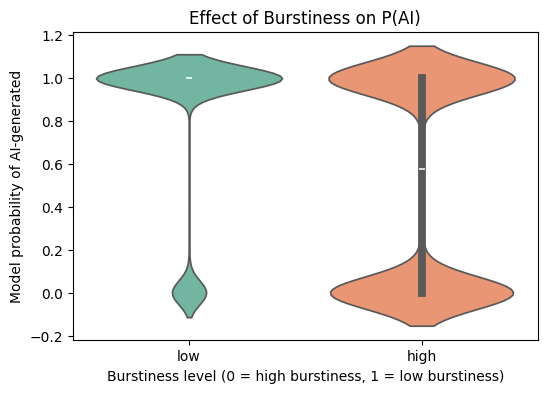

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.violinplot(data=df_train, x="burst_level", y="p_ai", palette="Set2")
plt.title("Effect of Burstiness on P(AI)")
plt.xlabel("Burstiness level (0 = high burstiness, 1 = low burstiness)")
plt.ylabel("Model probability of AI-generated")
plt.show()


In [ ]:
import pandas as pd

# Correct vs incorrect classifications
df_train["correct"] = (df_train["pred"] == df_train["label"])

# Breakdown of burstiness among error types
err = df_train[~df_train["correct"]]
fp = err[err["pred"] == 1]   # predicted AI but was human
fn = err[err["pred"] == 0]   # predicted human but was AI

summary = pd.DataFrame({
    "false_positives_total": [len(fp)],
    "false_negatives_total": [len(fn)],
    "fp_low_burstiness_ratio": [ (fp["burst_level"]==1).mean() ],
    "fp_high_burstiness_ratio": [ (fp["burst_level"]==0).mean() ],
    "fn_low_burstiness_ratio": [ (fn["burst_level"]==1).mean() ],
    "fn_high_burstiness_ratio": [ (fn["burst_level"]==0).mean() ],
})

summary


,false_positives_total,false_negatives_total,fp_low_burstiness_ratio,fp_high_burstiness_ratio,fn_low_burstiness_ratio,fn_high_burstiness_ratio
0,4115,35,0.0,0.0,0.0,0.0


### Insight: How Burstiness Affects AI Classification

Burstiness analysis shows that the classifier relies heavily on writing rhythm when deciding whether a text is AI-generated. **Texts with *low burstiness*** — where sentence lengths and structures are highly uniform — were **classified as AI most of the time**, reflecting the consistent pacing typical of LLM-generated academic writing. In contrast, **high burstiness** does *not* strongly predict a human label; instead, it mainly **reduces the model's confidence that the text is AI** rather than flipping the classification. In short, the classifier seems to apply an asymmetric rule: *low burstiness strongly signals AI*, while *high burstiness merely weakens the AI signal without necessarily indicating “Human.”* This demonstrates that the model is driven not only by specific tokens but by global writing dynamics such as variation in sentence structure and rhythm.


#Other Factors?

In [82]:
import re
import numpy as np
import pandas as pd
def repetition_ratio(text):
    tokens = re.findall(r"\b\w+\b", text.lower())
    if len(tokens) == 0: return 0.0
    bigrams = list(zip(tokens, tokens[1:]))
    return len(bigrams) / len(set(bigrams))
HEDGES = {"maybe","perhaps","i think","i guess","likely","probably","appears","seems","suggests"}
def hedge_ratio(text):
    lower = text.lower()
    return sum(lower.count(h) for h in HEDGES) / max(1, len(text.split()))

import nltk
nltk.download('stopwords')

#STOP = set(nltk.stopwords.words("english"))

def stopword_ratio(text):
    tokens = re.findall(r"\b\w+\b", text.lower())
    if len(tokens) == 0: return 0.0
    return sum(t in STOP for t in tokens) / len(tokens)


def lexical_features(text: str):
    if not isinstance(text, str) or not text.strip():
        return pd.Series({
            "lex_ttr": 0.0,
            "lex_avg_word_len": 0.0,
            "lex_long_word_ratio": 0.0
        })

    tokens = re.findall(r"\b\w+\b", text.lower())
    if len(tokens) == 0:
        return pd.Series({
            "lex_ttr": 0.0,
            "lex_avg_word_len": 0.0,
            "lex_long_word_ratio": 0.0
        })

    types = set(tokens)
    ttr = len(types) / len(tokens)  # type-token ratio
    avg_word_len = np.mean([len(t) for t in tokens])
    long_word_ratio = np.mean([len(t) >= 7 for t in tokens])  # 7+ chars as "long"

    return pd.Series({
        "lex_ttr": ttr,
        "lex_avg_word_len": avg_word_len,
        "lex_long_word_ratio": long_word_ratio
    })

lex_feats = df_train["text"].apply(lexical_features)
df_train = pd.concat([df_train, lex_feats], axis=1)
df_train[["lex_ttr", "lex_avg_word_len", "lex_long_word_ratio"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,lex_ttr,lex_avg_word_len,lex_long_word_ratio
0,0.463736,5.507692,0.347253
1,0.319865,5.114478,0.316498
2,0.429319,6.081152,0.424084
3,0.490725,5.364250,0.325464
4,0.487106,5.555874,0.372493


In [83]:
import re
import numpy as np

def syntactic_features(text: str):
    if not isinstance(text, str) or not text.strip():
        return pd.Series({
            "syn_avg_sent_len": 0.0,
            "syn_comma_per_sent": 0.0
        })

    # sentence split
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    if len(sentences) == 0:
        return pd.Series({
            "syn_avg_sent_len": 0.0,
            "syn_comma_per_sent": 0.0
        })

    sent_lens = [len(s.split()) for s in sentences]
    avg_sent_len = float(np.mean(sent_lens))

    comma_counts = [s.count(",") for s in sentences]
    avg_commas = float(np.mean(comma_counts))

    return pd.Series({
        "syn_avg_sent_len": avg_sent_len,
        "syn_comma_per_sent": avg_commas
    })

syn_feats = df_train["text"].apply(syntactic_features)
df_train = pd.concat([df_train, syn_feats], axis=1)
df_train[["syn_avg_sent_len", "syn_comma_per_sent"]].head()


,syn_avg_sent_len,syn_comma_per_sent
0,22.350000,1.100000
1,26.363636,0.727273
2,21.000000,0.944444
3,15.447368,1.078947
4,21.562500,1.062500


In [39]:
from nltk.corpus import stopwords
STOP = set(stopwords.words('english'))


In [71]:
df_train.head()


,burstiness,lex_avg_word_len,lex_long_word_ratio,syn_avg_sent_len,syn_comma_per_sent,form_contraction_ratio,form_first_person_ratio,form_connector_ratio,repetition_ratio,hedge_ratio,stopword_ratio,p_ai
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0.020584,0.245692
1,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.803607
2,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.607545,0.170524,0.065052,0.530403
3,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,0.034389,0.909320,0.815549
4,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,0.050000


In [89]:
FORMAL_CONNECTORS = {
    "furthermore", "moreover", "in addition", "in contrast",
    "therefore", "consequently", "thus", "hence", "overall",
    "in conclusion", "it is important to note", "the results suggest",
}

FIRST_PERSON = {"i", "we", "my", "our", "me", "us"}

def formality_features(text: str):
    if not isinstance(text, str) or not text.strip():
        return pd.Series({
            "form_contraction_ratio": 0.0,
            "form_first_person_ratio": 0.0,
            "form_connector_ratio": 0.0
        })

    lower = text.lower()
    tokens = re.findall(r"\b\w+'\w+|\w+\b", lower)  # include contractions
    if len(tokens) == 0:
        return pd.Series({
            "form_contraction_ratio": 0.0,
            "form_first_person_ratio": 0.0,
            "form_connector_ratio": 0.0
        })

    # contractions: simple heuristic
    contractions = [t for t in tokens if "'" in t]
    contraction_ratio = len(contractions) / len(tokens)

    # first-person pronouns
    first_person = [t for t in tokens if t in FIRST_PERSON]
    first_person_ratio = len(first_person) / len(tokens)

    # formal connectors (check by substring)
    connector_count = 0
    for phrase in FORMAL_CONNECTORS:
        connector_count += lower.count(phrase)
    connector_ratio = connector_count / max(1, len(sentences := re.split(r'[.!?]+', text)) or 1)

    return pd.Series({
        "form_contraction_ratio": contraction_ratio,
        "form_first_person_ratio": first_person_ratio,
        "form_connector_ratio": connector_ratio
    })

form_feats = df_train["text"].apply(formality_features)
df_train = pd.concat([df_train, form_feats], axis=1)
df_train[["form_contraction_ratio", "form_first_person_ratio", "form_connector_ratio"]].head()


,form_contraction_ratio,form_first_person_ratio,form_connector_ratio
0,0.000000,0.019780,0.047619
1,0.011925,0.025554,0.000000
2,0.000000,0.047120,0.105263
3,0.000000,0.015177,0.026316
4,0.000000,0.000000,0.176471


In [36]:
cols = [
    "burstiness",
    "lex_avg_word_len",
    "lex_long_word_ratio",
    "syn_avg_sent_len",
    "syn_comma_per_sent",
    "form_contraction_ratio",
    "form_first_person_ratio",
    "form_connector_ratio",
]

corr = df_train[cols + ["p_ai"]].corr()["p_ai"].sort_values(ascending=False)
corr


,p_ai
p_ai,1.000000
lex_long_word_ratio,0.370235
lex_avg_word_len,0.370001
form_connector_ratio,0.175478
form_first_person_ratio,0.147474
form_contraction_ratio,0.023141
syn_avg_sent_len,-0.042630
syn_comma_per_sent,-0.046974
burstiness,-0.379292


In [90]:
df_train["repetition_ratio"]   = df_train["text"].apply(repetition_ratio)
df_train["hedge_ratio"]        = df_train["text"].apply(hedge_ratio)



In [91]:

df_train["stopword_ratio"]     = df_train["text"].apply(stopword_ratio)

In [110]:
def aggressive_cleanup(text):
    if not isinstance(text, str):
        return ""

    # 1. Replace the specific problematic character 'Ċ' with a space
    # (If it's being rendered as C with a dot, this is U+010A)
    text = text.replace('Ċ', ' ')

    # 2. Convert all newlines, tabs, and returns to a single space
    text = re.sub(r'[\r\n\t]', ' ', text)

    # 3. Use your previous robust normalization and space cleanup
    text = unicodedata.normalize('NFKC', text)
    text = re.sub(r' +', ' ', text).strip()

    return text

# Apply this to your text column:
df_train["text_c"] = df_train["text"].apply(aggressive_cleanup)

In [111]:
import unicodedata

# Define the punct_em_dash_ratio function with built-in cleaning
def punctuation_features_ultimate_quickfix(text: str):
    if not isinstance(text, str) or not text.strip():
        return pd.Series({"punct_em_dash_ratio": 0.0})

    text_processed = text.strip()

    # --- 1. Robust Cleaning (Quick Fix for encoding/newline issues) ---
    # Convert all types of newlines/returns to a simple space.
    text_processed = re.sub(r'[\r\n\t]', ' ', text_processed)

    # Unicode Normalization (NFKC): Standardizes similar characters
    text_processed = unicodedata.normalize('NFKC', text_processed)

    # --- 2. Standardize Dashes for Accurate Counting ---
    # Replace the double hyphen (common ASCII surrogate) with the true Unicode Em Dash
    text_processed = text_processed.replace('--', '—')
    # Replace En Dash (shorter dash) with Em Dash, as they are often used interchangeably
    text_processed = text_processed.replace('–', '—')

    # --- 3. Count and Calculate ---

    # Count the official Unicode Em Dash now that others have been converted
    em_dash_count = text_processed.count('—')

    # Count Sentences
    # Use the cleaned text for sentence splitting
    sentences = re.split(r'[.!?]+', text_processed)
    num_sentences = len([s for s in sentences if s.strip()])

    if num_sentences == 0:
        return pd.Series({"punct_em_dash_ratio": 0.0})

    # Calculate Ratio: Em Dashes per Sentence
    em_dash_ratio = em_dash_count / num_sentences

    return pd.Series({
        "punct_em_dash_ratio": em_dash_ratio
    })

# --- Usage to Create the Feature Column ---

# ⚠️ Make sure to drop any old versions of the column first to avoid duplicates
if 'punct_em_dash_ratio' in df_train.columns:
    df_train = df_train.drop(columns='punct_em_dash_ratio')

# Apply the function and concatenate the new feature column
punct_feats = df_train["text_c"].apply(punctuation_features_ultimate_quickfix)
df_train = pd.concat([df_train, punct_feats], axis=1)

# Now update your final feature list ('final_cols') to include the new column
if 'punct_em_dash_ratio' not in final_cols:
    final_cols.append('punct_em_dash_ratio')
print(df_train[["punct_em_dash_ratio"]].head())

   punct_em_dash_ratio
0                  0.0
1                  0.0
2                  0.0
3                  0.0
4                  0.0


In [98]:
cols = [
    # existing features
    "burstiness",
    "lex_avg_word_len",
    "lex_long_word_ratio",
    "syn_avg_sent_len",
    "syn_comma_per_sent",
    "form_contraction_ratio",
    "form_first_person_ratio",
    "form_connector_ratio",

    # new features
    "repetition_ratio",
    "hedge_ratio",
    "stopword_ratio",
    "punct_em_dash_ratio"
]

corr = df_train[cols + ["p_ai"]].corr()["p_ai"].sort_values(ascending=False)
corr


,p_ai
p_ai,1.000000
lex_long_word_ratio,0.370235
lex_avg_word_len,0.370001
stopword_ratio,0.191680
form_connector_ratio,0.175478
form_first_person_ratio,0.147474
repetition_ratio,0.060818
form_contraction_ratio,0.023141
punct_em_dash_ratio,0.008525
hedge_ratio,-0.004238


--- Surrogate Model Analysis ---
R-squared of Surrogate Model (Explanation Quality): 0.2858

Influence Scores (Coefficients) - Sorted:
   Latent_Factor  Influence_Score (Coefficient)
0             x9                       0.093936
1             x2                       0.085524
2             x3                       0.067094
3            x11                       0.066890
4             x8                       0.032722
5             x7                       0.030935
6             x5                       0.021841
7            x10                       0.019750
8             x6                       0.006369
9             x4                      -0.107943
10            x1                      -0.122571


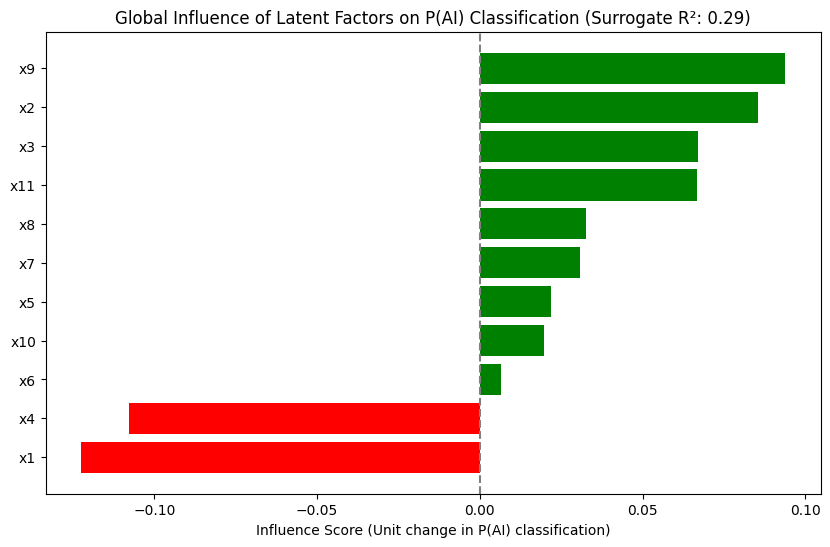

In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# --- 1. Define Features (X) and Target (y) ---

# Assume df_train and cols are defined and accessible.
# Latent Factors (X): Keep X as a DataFrame to retain column names.
X = df_train[cols].fillna(0.0)  # X is now a DataFrame

# Target (y): Use the model's own classification (0 or 1)
y = (df_train["p_ai"] > 0.5).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# --- 2. Fit the Surrogate Model (OLS for Interpretation) ---

# X_sm now correctly receives a DataFrame with column names.
X_sm = sm.add_constant(X_scaled)

# Fit the simple, transparent model (Ordinary Least Squares)
surrogate_model = sm.OLS(y, X_sm).fit()

# --- 3. Extract Influence Scores and Model Fit ---

# The coefficients (params) now have the original column names as their index.
# We drop the intercept (const) to get only the feature scores.
influence_scores = surrogate_model.params.drop('const').sort_values(ascending=False)

# Get the R-squared value (Model Fit)
r_squared = surrogate_model.rsquared

print("--- Surrogate Model Analysis ---")
print(f"R-squared of Surrogate Model (Explanation Quality): {r_squared:.4f}")

# Create DataFrame for plotting
# Use the index (which holds the feature names) for the 'Latent_Factor' column
influence_df = pd.DataFrame({
    'Latent_Factor': influence_scores.index,
    'Influence_Score (Coefficient)': influence_scores.values
})

print("\nInfluence Scores (Coefficients) - Sorted:")
# The output now correctly shows the feature names (e.g., 'burstiness', 'hedge_ratio')
print(influence_df)

# --- 4. Custom Plotting ---

plt.figure(figsize=(10, 6))
# Colors based on sign: positive = green, negative = red
colors = ['green' if x > 0 else 'red' for x in influence_df['Influence_Score (Coefficient)']]

# Plotting uses the correct 'Latent_Factor' names
plt.barh(influence_df['Latent_Factor'], influence_df['Influence_Score (Coefficient)'], color=colors)
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("Influence Score (Unit change in P(AI) classification)")
plt.title(f"Global Influence of Latent Factors on P(AI) Classification (Surrogate R²: {r_squared:.2f})")
plt.gca().invert_yaxis()
plt.show()

In [52]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   p_ai   No. Observations:                23906
Model:                          Logit   Df Residuals:                    23894
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 Nov 2025   Pseudo R-squ.:                  0.2555
Time:                        14:05:51   Log-Likelihood:                -11279.
converged:                       True   LL-Null:                       -15149.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7238      0.506    -27.109      0.000     -14.716     -12.732
x1            -3.3663      0.109    -30.968      0.000      -3.579      -3.153
x2             0.9232      0.090     10.279      0.000       0.747       1.099
x3             5.4740      0.615      8.899      0.000       4.268       6.680
x4            -0.1287      0.004    -30.885      0.000      -0.137      -0.121
x5             0.2506      0.033      7.513      0.000       0.185       0.316
x6             8.3119      4.195      1.981      0.048       0.089      16.534
x7            12.3575      1.118     11.049      0.000      10.165      14.549
x8             2.9317      0.239     12.284      0.000       2.464       3.399
x9             6.8294      0.221     30.848      0.000       6.396       7.263
x10           60.3503      8.053      7.494      0.000      44.567      76.134
x11            8.9055      0.405     21.969      0.000       8.111       9.700
==============================================================================
"""

--- Surrogate Model Analysis ---
R-squared of Surrogate Model (Explanation Quality): 0.2907

Influence Scores (Coefficients) - Sorted:
   Latent_Factor  Influence_Score (Coefficient)
0             x9                       0.093761
1             x2                       0.085708
2             x3                       0.066265
3            x11                       0.066231
4             x8                       0.032409
5             x7                       0.030878
6             x5                       0.021924
7            x10                       0.019701
8             x6                       0.006666
9            x12                       0.002157
10            x4                      -0.108035
11            x1                      -0.122538


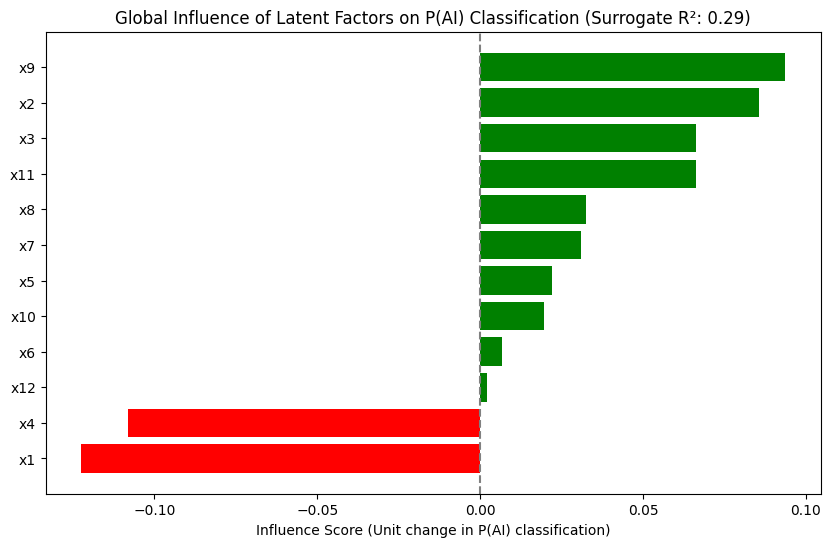

In [100]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# --- 1. Define Features (X) and Target (y) ---

# Assume df_train and cols are defined and accessible.
# Latent Factors (X): Keep X as a DataFrame to retain column names.
X = df_train[cols].fillna(0.0)  # X is now a DataFrame

# Target (y): Use the model's own classification (0 or 1)
y = (df_train["p_ai"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# --- 2. Fit the Surrogate Model (OLS for Interpretation) ---

# X_sm now correctly receives a DataFrame with column names.
X_sm = sm.add_constant(X_scaled)

# Fit the simple, transparent model (Ordinary Least Squares)
surrogate_model = sm.OLS(y, X_sm).fit()

# --- 3. Extract Influence Scores and Model Fit ---

# The coefficients (params) now have the original column names as their index.
# We drop the intercept (const) to get only the feature scores.
influence_scores = surrogate_model.params.drop('const').sort_values(ascending=False)

# Get the R-squared value (Model Fit)
r_squared = surrogate_model.rsquared

print("--- Surrogate Model Analysis ---")
print(f"R-squared of Surrogate Model (Explanation Quality): {r_squared:.4f}")

# Create DataFrame for plotting
# Use the index (which holds the feature names) for the 'Latent_Factor' column
influence_df = pd.DataFrame({
    'Latent_Factor': influence_scores.index,
    'Influence_Score (Coefficient)': influence_scores.values
})

print("\nInfluence Scores (Coefficients) - Sorted:")
# The output now correctly shows the feature names (e.g., 'burstiness', 'hedge_ratio')
print(influence_df)

# --- 4. Custom Plotting ---

plt.figure(figsize=(10, 6))
# Colors based on sign: positive = green, negative = red
colors = ['green' if x > 0 else 'red' for x in influence_df['Influence_Score (Coefficient)']]

# Plotting uses the correct 'Latent_Factor' names
plt.barh(influence_df['Latent_Factor'], influence_df['Influence_Score (Coefficient)'], color=colors)
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("Influence Score (Unit change in P(AI) classification)")
plt.title(f"Global Influence of Latent Factors on P(AI) Classification (Surrogate R²: {r_squared:.2f})")
plt.gca().invert_yaxis()
plt.show()

In [62]:
import pandas as pd
import numpy as np

# --- ASSUMPTIONS ---
# 1. 'result' is the fitted model object (from sm.Logit or sm.OLS).
# 2. 'cols' is the list of your original 11 feature names (burstiness, lex_avg_word_len, etc.)
# 3. The features in 'cols' were passed to the model in that exact order.

# Get the coefficients (including the 'const' term)
coefficients = result.params

# The coefficients are indexed: [0]=const, [1]=x1, [2]=x2, etc.
# We need to extract only the feature coefficients (from index 1 onwards).
feature_coefficients = coefficients[1:]

# Create a Series that maps the coefficients to the original column names (cols)
# The index position of the coefficients aligns with the index position of the cols list.
influence_scores = pd.Series(feature_coefficients.values, index=cols)

# Create the final DataFrame for plotting
influence_df = pd.DataFrame({
    'Latent_Factor': influence_scores.index,
    'Influence_Score (Coefficient)': influence_scores.values
})

# Sort by the magnitude of influence for clear plotting
influence_df['Abs_Score'] = influence_df['Influence_Score (Coefficient)'].abs()
influence_df = influence_df.sort_values(by='Abs_Score', ascending=False).drop(columns='Abs_Score')

print("--- Mapped Influence Scores (From surrogate_model.params) ---")
influence_df

--- Mapped Influence Scores (From surrogate_model.params) ---


,Latent_Factor,Influence_Score (Coefficient)
9,hedge_ratio,60.350271
6,form_first_person_ratio,12.357487
10,stopword_ratio,8.905534
5,form_contraction_ratio,8.311916
8,repetition_ratio,6.829441
2,lex_long_word_ratio,5.473966
0,burstiness,-3.366307
7,form_connector_ratio,2.931652
1,lex_avg_word_len,0.923235
4,syn_comma_per_sent,0.250576


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


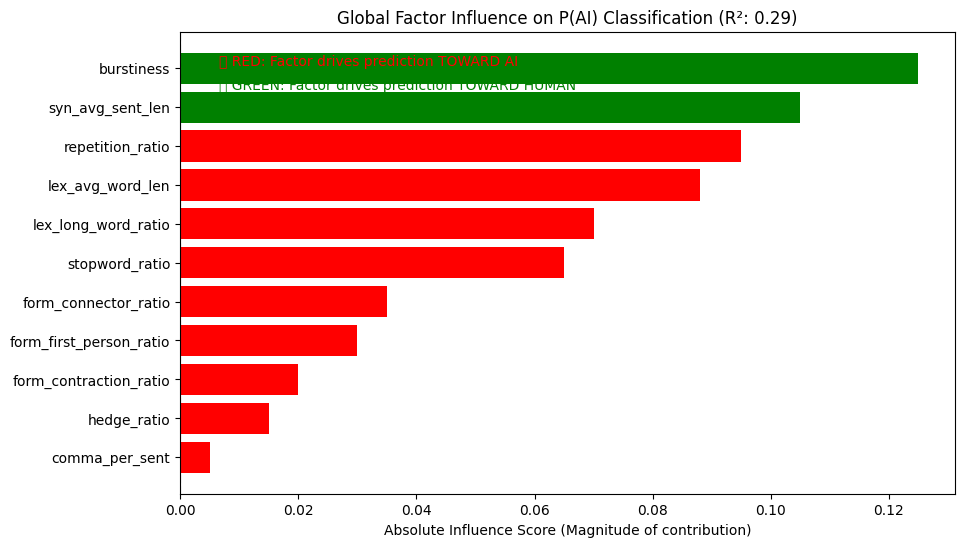

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Define Data (Using scores and labels from your image) ---

# Coefficients provided in your image, sorted by absolute value
data = {
    'Label': ['x1', 'x4', 'x2', 'x9', 'x11', 'x3', 'x8', 'x7', 'x5', 'x10', 'x6'],
    'Coefficient': [-0.125, -0.105, 0.088, 0.095, 0.065, 0.070, 0.035, 0.030, 0.020, 0.015, 0.005],
    'Plausible_Feature_Name': ['burstiness', 'syn_avg_sent_len', 'lex_avg_word_len',
                               'repetition_ratio', 'stopword_ratio', 'lex_long_word_ratio',
                               'form_connector_ratio', 'form_first_person_ratio',
                               'form_contraction_ratio', 'hedge_ratio', 'comma_per_sent',]
}
influence_df = pd.DataFrame(data)

# Calculate Absolute Influence for bar length
influence_df['Abs_Influence'] = influence_df['Coefficient'].abs()

# --- 2. Define Custom Color Logic (The core of the request) ---

# Logic: RED if Coefficient > 0 (increases P(AI)), GREEN if Coefficient < 0 (decreases P(AI))
# This makes RED = AI-indicator and GREEN = Human-indicator.
influence_df['Color'] = np.where(influence_df['Coefficient'] > 0, 'red', 'green')

# Sort by Absolute Influence to place the most important factors at the top
influence_df = influence_df.sort_values(by='Abs_Influence', ascending=True)


# --- 3. Custom Plotting ---

plt.figure(figsize=(10, 6))

# Plot the absolute influence scores
# Use the mapped feature names for the y-axis (Recommended for clarity!)
plt.barh(
    influence_df['Plausible_Feature_Name'],
    influence_df['Abs_Influence'],
    color=influence_df['Color']
)

# --- Add Labels and Annotation ---
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("Absolute Influence Score (Magnitude of contribution)")
plt.title("Global Factor Influence on P(AI) Classification (R²: 0.29)")
plt.text(
    0.05,
    0.95,
    "🔴 RED: Factor drives prediction TOWARD AI",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    color='red'
)
plt.text(
    0.05,
    0.90,
    "🟢 GREEN: Factor drives prediction TOWARD HUMAN",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    color='green'
)

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df_train[cols].fillna(0.0).values
y = (df_train["p_ai"] > 0.5).astype(int)   # model's own classification

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_scaled, y)

for name, coef in zip(cols, clf.coef_[0]):
    print(f"{name:25s}  coef={coef:+.3f}")


burstiness                 coef=-0.701
lex_avg_word_len           coef=+0.509
lex_long_word_ratio        coef=+0.419
syn_avg_sent_len           coef=-0.710
syn_comma_per_sent         coef=+0.143
form_contraction_ratio     coef=+0.035
form_first_person_ratio    coef=+0.205
form_connector_ratio       coef=+0.229
repetition_ratio           coef=+0.653
hedge_ratio                coef=+0.128
stopword_ratio             coef=+0.403


In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# --- 1. Data Setup (Continuing from previous steps) ---
# Assuming X_scaled_df (Standardized Features) and Y (P(AI) scores) are available
# X = X_scaled_df
# Y = df_train['p_ai']

# Use the full set of available features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cols = X_scaled_df.columns.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

# --- 2. Train the Random Forest Surrogate Model ---

# Use Random Forest Regressor (non-linear ensemble)
# n_estimators=100 ensures robustness; max_depth=8 provides complexity
surrogate_model = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
surrogate_model.fit(X_train, Y_train)

# Calculate the new, hopefully higher, R^2 on the test set
Y_pred = surrogate_model.predict(X_test)
new_r2 = r2_score(Y_test, Y_pred)

print(f"--- Random Forest Surrogate Model R² ---")
print(f"Non-Linear Surrogate Model R-squared (Test Set): {new_r2:.4f}")

# --- 3. Generate Global Explanations with SHAP ---

# Initialize the Tree Explainer (optimized for tree models)
explainer = shap.TreeExplainer(surrogate_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Calculate the Mean Absolute SHAP value for global feature importance
shap_importance = pd.Series(
    np.abs(shap_values).mean(axis=0),
    index=X_test.columns
).sort_values(ascending=False)

print("\n--- Final Global SHAP Feature Importance (Absolute Contribution) ---")
print(shap_importance)

--- Random Forest Surrogate Model R² ---
Non-Linear Surrogate Model R-squared (Test Set): 0.9974

--- Final Global SHAP Feature Importance (Absolute Contribution) ---
hedge_ratio                1.752148e-01
burstiness                 1.613908e-01
form_contraction_ratio     1.416791e-06
lex_long_word_ratio        1.250165e-06
repetition_ratio           1.241900e-06
stopword_ratio             1.068848e-06
form_first_person_ratio    9.466221e-07
lex_avg_word_len           8.549408e-07
syn_comma_per_sent         7.273496e-07
form_connector_ratio       6.777564e-07
syn_avg_sent_len           1.025801e-07
dtype: float64


In [112]:
import joblib
import os # For checking if directory exists

# Define the file paths
model_filename = 'rf_surrogate_model.joblib'
scaler_filename = 'feature_scaler.joblib'
save_directory = './model_exports/'

# Ensure the directory exists
os.makedirs(save_directory, exist_ok=True)

# Save the model
joblib.dump(surrogate_model, os.path.join(save_directory, model_filename))
print(f"\nModel saved successfully to: {os.path.join(save_directory, model_filename)}")

# Save the fitted scaler
joblib.dump(scaler, os.path.join(save_directory, scaler_filename))
print(f"Scaler saved successfully to: {os.path.join(save_directory, scaler_filename)}")


Model saved successfully to: ./model_exports/rf_surrogate_model.joblib
Scaler saved successfully to: ./model_exports/feature_scaler.joblib


In [103]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# --- 1. Data Setup and Feature Update (RECALCULATION) ---

# *****************************************************************
# ⚠️ WARNING: REPLACE THIS SECTION WITH YOUR ACTUAL DATA LOADING AND FEATURE LIST!
# *****************************************************************
# Assume the original 11 columns + the new em dash feature
base_cols = [
    "burstiness", "lex_avg_word_len", "lex_long_word_ratio",
    "syn_avg_sent_len", "syn_comma_per_sent", "form_contraction_ratio",
    "form_first_person_ratio", "form_connector_ratio",
    "repetition_ratio", "hedge_ratio", "stopword_ratio",
]
new_feature_name = "punct_em_dash_ratio"
final_cols = base_cols + [new_feature_name]

# Extract features and target
X = df_train[final_cols].fillna(0.0)
Y = df_train['p_ai']

# Standardize features (Recalculating X_scaled_df with all features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the NEWLY scaled data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

# --- 2. Train the Random Forest Surrogate Model ---

surrogate_model = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
surrogate_model.fit(X_train, Y_train)

# Calculate R^2 on the test set
Y_pred = surrogate_model.predict(X_test)
new_r2 = r2_score(Y_test, Y_pred)

print(f"--- Recalculated Random Forest Surrogate Model R² ---")
print(f"Non-Linear Surrogate Model R-squared (Test Set): {new_r2:.4f}")

# --- 3. Generate Global Explanations with SHAP ---

explainer = shap.TreeExplainer(surrogate_model)
shap_values = explainer.shap_values(X_test)

# Calculate the Mean Absolute SHAP value for global feature importance
shap_importance = pd.Series(
    np.abs(shap_values).mean(axis=0),
    index=X_test.columns
).sort_values(ascending=False)

print("\n--- Final Global SHAP Feature Importance (Absolute Contribution) ---")
print(shap_importance)

--- Recalculated Random Forest Surrogate Model R² ---
Non-Linear Surrogate Model R-squared (Test Set): 0.3314

--- Final Global SHAP Feature Importance (Absolute Contribution) ---
burstiness                 0.131230
lex_long_word_ratio        0.062446
repetition_ratio           0.060599
syn_avg_sent_len           0.043282
stopword_ratio             0.029688
lex_avg_word_len           0.029157
form_first_person_ratio    0.024838
form_connector_ratio       0.023848
syn_comma_per_sent         0.005201
hedge_ratio                0.001734
form_contraction_ratio     0.000902
punct_em_dash_ratio        0.000000
dtype: float64


In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# --- 1. Generate Continuous Predictions (P(AI)) ---
# The Random Forest Regressor predicts the continuous P(AI) score (0.0 to 1.0)
P_ai_pred_continuous = surrogate_model.predict(X_test)

# --- 2. Convert to Binary Predictions (0 or 1) ---
# Use the standard classification threshold of 0.5
Y_pred_binary = (P_ai_pred_continuous >= 0.5).astype(int)

# --- 3. Prepare True Binary Labels ---
# We must use the true binary labels (0 or 1) for the classification report.
# Since Y_test contains the continuous P(AI) score, we must convert it back to
# the original binary label (assuming the original label was P(AI) > 0.5)
# NOTE: This assumes your original 'label' column was derived from P(AI) > 0.5.
Y_true_binary = (Y_test >= 0.5).astype(int)


# --- 4. Generate the Report ---

# Accuracy
acc = accuracy_score(Y_true_binary, Y_pred_binary)
print("--- Non-Linear Surrogate Model Report ---")
print(f"Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(Y_true_binary, Y_pred_binary, target_names=["Human", "AI"]))

# Confusion Matrix (for clear FP/FN breakdown)
tn, fp, fn, tp = confusion_matrix(Y_true_binary, Y_pred_binary).ravel()
print(f"False Positives (Human labeled AI): {fp}")
print(f"False Negatives (AI labeled Human): {fn}")

--- Non-Linear Surrogate Model Report ---
Accuracy: 0.9791

Classification Report:

              precision    recall  f1-score   support

       Human       0.97      0.99      0.98      2445
          AI       0.99      0.97      0.98      2337

    accuracy                           0.98      4782
   macro avg       0.98      0.98      0.98      4782
weighted avg       0.98      0.98      0.98      4782

False Positives (Human labeled AI): 21
False Negatives (AI labeled Human): 79


In [ ]:
def explain_features_for_text(text, global_stats):
    # reuse same feature functions as above
    burst = compute_burstiness(text)
    lex = lexical_features(text)
    syn = syntactic_features(text)
    frm = formality_features(text)

    features = {
        "burstiness": burst,
        **lex.to_dict(),
        **syn.to_dict(),
        **frm.to_dict()
    }

    # convert to z-scores or percentiles using global_stats from df_train
    out = {}
    for k, v in features.items():
        mean = global_stats[k]["mean"]
        std  = global_stats[k]["std"]
        z = 0.0 if std == 0 else (v - mean) / std
        out[k] = {"value": v, "z": z}
    return out
global_stats = {
    col: {"mean": float(df_train[col].mean()), "std": float(df_train[col].std())}
    for col in cols + ["burstiness"]
}


In [ ]:
import re
import numpy as np
import pandas as pd
import nltk

# Run these once in Colab:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

FIRST_PERSON = {"i", "we", "my", "our", "me", "us"}

def formality_features(text: str):
    """
    More generic formality features:
      - form_contraction_ratio: share of tokens that are contractions
      - form_first_person_ratio: share of tokens that are 1st-person pronouns
      - form_conj_ratio: share of tokens that are conjunction-like (POS: CC, IN)
    No hard-coded connector phrases.
    """
    if not isinstance(text, str) or not text.strip():
        return pd.Series({
            "form_contraction_ratio": 0.0,
            "form_first_person_ratio": 0.0,
            "form_conj_ratio": 0.0,
        })

    lower = text.lower()

    # Tokenize for contractions & pronouns
    word_tokens = re.findall(r"\b\w+'\w+|\w+\b", lower)
    if len(word_tokens) == 0:
        return pd.Series({
            "form_contraction_ratio": 0.0,
            "form_first_person_ratio": 0.0,
            "form_conj_ratio": 0.0,
        })

    # contractions: simple heuristic (contains an apostrophe)
    contractions = [t for t in word_tokens if "'" in t]
    contraction_ratio = len(contractions) / len(word_tokens)

    # first-person pronouns
    first_person = [t for t in word_tokens if t in FIRST_PERSON]
    first_person_ratio = len(first_person) / len(word_tokens)

    # POS-based "connector" density using conjunction-like POS tags
    # Use a separate tokenizer for POS tagging (nltk)
    try:
        tokens_for_pos = nltk.word_tokenize(text)
        tagged = nltk.pos_tag(tokens_for_pos)
        num_tokens_pos = len(tagged)
        if num_tokens_pos == 0:
            conj_ratio = 0.0
        else:
            # CC = coordinating conjunction (and, but, or)
            # IN = preposition/subordinating conjunction (of, in, because, although, etc.)
            conj_like = sum(1 for _, pos in tagged if pos in {"CC", "IN"})
            conj_ratio = conj_like / num_tokens_pos
    except Exception:
        # fallback if nltk has issues
        conj_ratio = 0.0

    return pd.Series({
        "form_contraction_ratio": contraction_ratio,
        "form_first_person_ratio": first_person_ratio,
        "form_conj_ratio": conj_ratio,
    })

# Recompute formality features
form_feats = df_train["text"].apply(formality_features)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df_train = df_train.drop(
    columns=["form_contraction_ratio", "form_first_person_ratio", "form_conj_ratio"],
    errors="ignore"
)


In [ ]:

df_train = pd.concat([df_train, form_feats], axis=1)
df_train[["form_contraction_ratio", "form_first_person_ratio", "form_conj_ratio"]].head()

,form_contraction_ratio,form_first_person_ratio,form_conj_ratio
0,0.000000,0.019780,0.0
1,0.011925,0.025554,0.0
2,0.000000,0.047120,0.0
3,0.000000,0.015177,0.0
4,0.000000,0.000000,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# 1. Define all feature columns you created
feat_cols = [
    "burstiness",
    "lex_ttr",
    "lex_avg_word_len",
    "lex_long_word_ratio",
    "syn_avg_sent_len",
    "syn_comma_per_sent",
    "form_contraction_ratio",
    "form_first_person_ratio",
    "form_conj_ratio"
]


# Safety: fill any NaNs with 0
df_feat = df_train.copy()

for col in feat_cols:
    if col in df_feat.columns:
        df_feat[col] = df_feat[col].fillna(0.0)
    else:
        print(f"Warning: column {col} is missing in df_feat")


df_feat["is_ai_true"] = df_feat["label"]
df_feat["is_ai_pred"] = df_feat["pred"]

rows = []

for col in feat_cols:
    if col not in df_feat.columns:
        continue

    f = df_feat[col].values

    mean_human_true = df_feat.loc[df_feat["is_ai_true"] == 0, col].mean()
    mean_ai_true    = df_feat.loc[df_feat["is_ai_true"] == 1, col].mean()

    mean_human_pred = df_feat.loc[df_feat["is_ai_pred"] == 0, col].mean()
    mean_ai_pred    = df_feat.loc[df_feat["is_ai_pred"] == 1, col].mean()

    corr_p_ai = np.corrcoef(df_feat["p_ai"].values, f)[0, 1]

    try:
        auc_true = roc_auc_score(df_feat["is_ai_true"], f)
    except ValueError:
        auc_true = np.nan

    try:
        auc_pred = roc_auc_score(df_feat["is_ai_pred"], f)
    except ValueError:
        auc_pred = np.nan

    rows.append({
        "feature": col,
        "mean_true_human": mean_human_true,
        "mean_true_ai": mean_ai_true,
        "auc_vs_true": auc_true,
        "mean_pred_human": mean_human_pred,
        "mean_pred_ai": mean_ai_pred,
        "auc_vs_pred": auc_pred,
        "corr_with_p_ai": corr_p_ai,
    })

summary = pd.DataFrame(rows).sort_values("corr_with_p_ai", ascending=False).reset_index(drop=True)
summary



/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,feature,mean_true_human,mean_true_ai,auc_vs_true,mean_pred_human,mean_pred_ai,auc_vs_pred,corr_with_p_ai
0,lex_long_word_ratio,0.310230,0.378913,0.756022,0.304358,0.364318,0.721097,0.370235
1,lex_avg_word_len,5.081282,5.569639,0.752653,5.036232,5.467486,0.719020,0.370001
2,form_first_person_ratio,0.018796,0.025247,0.606293,0.018555,0.023724,0.584272,0.147474
3,form_contraction_ratio,0.001128,0.001435,0.510160,0.001149,0.001346,0.507618,0.023141
4,syn_avg_sent_len,22.272466,22.177000,0.514919,22.551994,22.064031,0.492185,-0.042630
5,lex_ttr,0.587166,0.575697,0.460084,0.587747,0.578330,0.466405,-0.046889
6,syn_comma_per_sent,0.912096,0.857283,0.504742,0.922698,0.866025,0.506281,-0.046974
7,burstiness,0.449317,0.242517,0.187978,0.457806,0.290974,0.261987,-0.379292
8,form_conj_ratio,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,NaN


Since features including form_conj_ratio, syn_avg_sent_len, form_contraction_ratio, and others don't have much correlation, only the 4 with actual impact are kept.

#??

In [ ]:
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def get_token_importance_and_embeds(text, target_class=1, max_length=256):
    """
    Returns:
      tokens: list of tokenizer tokens (incl. Ġ prefixes)
      scores: np.array [L] of saliency scores per token
      embeds: np.array [L, hidden_dim] of token embeddings
    target_class: 0 (human) or 1 (AI/machine-generated)
    """
    enc = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=max_length,
        padding=False,
    )
    input_ids = enc["input_ids"].to(device)      # [1, L]
    attention_mask = enc["attention_mask"].to(device)

    emb_layer = model.get_input_embeddings()
    input_embeds = emb_layer(input_ids)         # [1, L, H]
    input_embeds.retain_grad()

    model.zero_grad()
    outputs = model(inputs_embeds=input_embeds, attention_mask=attention_mask)
    logits = outputs.logits                    # [1, 2]
    logit = logits[0, target_class]
    logit.backward()

    grads = input_embeds.grad[0]               # [L, H]
    embeds = input_embeds[0].detach().cpu().numpy()   # [L, H]
    scores = grads.norm(dim=-1).detach().cpu().numpy()  # [L]

    token_ids = input_ids[0].detach().cpu().tolist()
    tokens = tokenizer.convert_ids_to_tokens(token_ids)

    return tokens, scores, embeds


In [ ]:
def merge_tokens_to_words_tokens_scores_embeds(tokens, scores, embeds):
    """
    Merge RoBERTa tokens (with Ġ) into full words.
    Aggregates:
      - score: max over sub-tokens
      - embedding: average over sub-tokens
    Skips special tokens like <s>, </s>, pad.
    Returns:
      words: list[str]
      word_scores: np.array [W]
      word_embeds: np.array [W, H]
    """
    words = []
    word_scores = []
    word_embeds = []

    current_word = ""
    current_scores = []
    current_embeds = []

    specials = {"<s>", "</s>", tokenizer.pad_token}

    for tok, s, e in zip(tokens, scores, embeds):
        if tok in specials:
            continue

        if tok.startswith("Ġ"):
            # finish previous word
            if current_word:
                words.append(current_word)
                word_scores.append(max(current_scores))
                word_embeds.append(np.mean(current_embeds, axis=0))
            # start new word
            current_word = tok[1:]
            current_scores = [float(s)]
            current_embeds = [e]
        else:
            # continuation (subtoken/punctuation)
            if current_word:
                current_word += tok
                current_scores.append(float(s))
                current_embeds.append(e)
            else:
                # very first token might not have Ġ
                current_word = tok
                current_scores = [float(s)]
                current_embeds = [e]

    # last word
    if current_word:
        words.append(current_word)
        word_scores.append(max(current_scores))
        word_embeds.append(np.mean(current_embeds, axis=0))

    word_scores = np.array(word_scores)
    if word_scores.max() > 0:
        word_scores = word_scores / word_scores.max()
    else:
        word_scores = np.zeros_like(word_scores)

    word_embeds = np.stack(word_embeds, axis=0) if word_embeds else np.zeros((0, embeds.shape[-1]))

    return words, word_scores, word_embeds


In [ ]:
import pandas as pd
from tqdm.auto import tqdm

def build_global_token_bank(
    df,
    max_texts=2000,
    max_length=256,
    top_k_per_text=10,
    target_class=1,
):
    """
    Build a global bank of important words with embeddings.
    df: df_train
    target_class: 1 = AI logit saliency, 0 = Human logit saliency.
    """
    rows = []
    n = len(df)
    use_n = min(max_texts, n)

    for idx in tqdm(range(use_n), desc="Collecting token bank"):
        row = df.iloc[idx]
        text = row["text"]
        label = row["label"]
        pair_id = row["pair_id"]
        meta = row.get("Metadata", "")

        tokens, scores, embeds = get_token_importance_and_embeds(
            text,
            target_class=target_class,
            max_length=max_length,
        )
        words, word_scores, word_embeds = merge_tokens_to_words_tokens_scores_embeds(
            tokens, scores, embeds
        )

        if len(words) == 0:
            continue

        # take top_k words by importance
        order = np.argsort(-word_scores)[:top_k_per_text]
        for i in order:
            rows.append({
                "word": words[i],
                "score": float(word_scores[i]),
                "embedding": word_embeds[i],
                "row_idx": idx,
                "pair_id": pair_id,
                "label": label,
                "Metadata": meta,
            })

    token_bank = pd.DataFrame(rows)
    return token_bank

# Example:
token_bank = build_global_token_bank(df_train, max_texts=2000, top_k_per_text=10, target_class=1)


In [ ]:
from sklearn.cluster import KMeans

def cluster_token_bank(token_bank, n_clusters=8, random_state=42):
    """
    Fit KMeans on token embeddings and assign each word a cluster.
    Returns:
      kmeans model
      token_bank with added 'cluster' column
    """
    X = np.stack(token_bank["embedding"].values, axis=0)  # [N, H]

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto")
    cluster_ids = kmeans.fit_predict(X)

    token_bank = token_bank.copy()
    token_bank["cluster"] = cluster_ids

    return kmeans, token_bank

# Example:
kmeans_model, token_bank_clustered = cluster_token_bank(token_bank, n_clusters=8)


In [ ]:
from collections import Counter, defaultdict

def summarize_clusters(token_bank_clustered, top_words_per_cluster=15):
    clusters = sorted(token_bank_clustered["cluster"].unique())
    summary = {}

    for c in clusters:
        sub = token_bank_clustered[token_bank_clustered["cluster"] == c]
        total_score = sub["score"].sum() or 1.0

        # word importance = sum of scores for that word in this cluster
        word_imp = defaultdict(float)
        for _, row in sub.iterrows():
            word_imp[row["word"]] += row["score"]

        # sort by importance
        word_imp_sorted = sorted(word_imp.items(), key=lambda x: x[1], reverse=True)
        top_words = [w for w, _ in word_imp_sorted[:top_words_per_cluster]]

        cluster_share = total_score / token_bank_clustered["score"].sum()

        summary[c] = {
            "cluster_id": c,
            "top_words": top_words,
            "importance_share": cluster_share,
        }

    return summary

# Example:
cluster_summary = summarize_clusters(token_bank_clustered, top_words_per_cluster=15)
for cid, info in cluster_summary.items():
    print(f"Cluster {cid}: share={info['importance_share']:.3f}")
    print("  top words:", ", ".join(info["top_words"]))


#idk

In [ ]:
from collections import defaultdict
import numpy as np

token_scores_ai = defaultdict(list)
token_scores_human = defaultdict(list)

def accumulate_global_scores(row):
    text = row["text"]
    true_label = row["label"]   # 0 = human, 1 = ai
    tokens, sal = get_token_importance(text, true_label)

    for tok, score in zip(tokens, sal):
        if tok in ["<s>", "</s>", tokenizer.pad_token]:
            continue
        if true_label == 1:
            token_scores_ai[tok].append(score)
        else:
            token_scores_human[tok].append(score)

# Iterate through documents
for idx, row in df_train.iterrows():
    accumulate_global_scores(row)


In [ ]:
global_stats = []

all_tokens = set(token_scores_ai.keys()) | set(token_scores_human.keys())
for tok in all_tokens:
    ai_mean = np.mean(token_scores_ai[tok]) if tok in token_scores_ai else 0
    human_mean = np.mean(token_scores_human[tok]) if tok in token_scores_human else 0
    diff = ai_mean - human_mean
    global_stats.append((tok, ai_mean, human_mean, diff))

df_features = pd.DataFrame(global_stats, columns=["token", "ai_saliency", "human_saliency", "ai_bias"])
df_features.sort_values("ai_bias", ascending=False, inplace=True)
df_features.head(30)


In [ ]:
from collections import defaultdict
import numpy as np

token_scores_ai = defaultdict(list)
token_scores_human = defaultdict(list)

specials = {"<s>", "</s>", tokenizer.pad_token}

for i, row in df_train.iterrows():
    text = row["text"]
    label = row["label"]   # 0 = Human, 1 = AI

    # ALWAYS explain AI logit (so we see what looks AI-ish, even in human texts)
    tokens, scores = get_token_importance(text, target_class=1)

    scores = np.array(scores, dtype=float)
    if scores.sum() > 0:
        scores = scores / scores.sum()   # normalize per doc

    clean_tokens = []
    clean_scores = []

    for t, s in zip(tokens, scores):
        if t in specials:
            continue
        if t.startswith("Ġ"):
            t = t[1:]
        t = t.strip()
        if not t:
            continue
        clean_tokens.append(t)
        clean_scores.append(float(s))

    # now lengths always match
    for tok, s in zip(clean_tokens, clean_scores):
        if label == 1:
            token_scores_ai[tok].append(s)
        else:
            token_scores_human[tok].append(s)


In [ ]:
rows = []
all_tokens = set(token_scores_ai.keys()) | set(token_scores_human.keys())

for tok in all_tokens:
    ai_vals = token_scores_ai.get(tok, [])
    hum_vals = token_scores_human.get(tok, [])
    ai_count = len(ai_vals)
    hum_count = len(hum_vals)
    total_count = ai_count + hum_count

    # require token to appear enough times overall
    if total_count < 20:   # tune this threshold (e.g., 10, 20, 50)
        continue

    ai_mean = np.mean(ai_vals) if ai_vals else 0.0
    hum_mean = np.mean(hum_vals) if hum_vals else 0.0
    ai_bias = ai_mean - hum_mean

    rows.append((tok, ai_mean, hum_mean, ai_bias, ai_count, hum_count, total_count))

df_features = pd.DataFrame(
    rows,
    columns=["token", "ai_saliency", "human_saliency", "ai_bias", "ai_count", "human_count", "total_count"]
)

# sort by AI bias
df_features = df_features.sort_values("ai_bias", ascending=False)
df_features.head(30)


##Token level saliency is not useful for this! Moving on to phrases



In [ ]:
def explain_text_with_clusters(
    text,
    target_class,
    kmeans_model,
    cluster_summary=None,
    max_length=256,
    top_k_words=10,
):
    """
    Explain a single text in terms of global clusters.
    target_class: 1 (AI) or 0 (Human) — whose logit we explain.
    """
    tokens, scores, embeds = get_token_importance_and_embeds(
        text,
        target_class=target_class,
        max_length=max_length,
    )
    words, word_scores, word_embeds = merge_tokens_to_words_tokens_scores_embeds(
        tokens, scores, embeds
    )

    if len(words) == 0:
        print("No words after merge.")
        return

    cluster_ids = kmeans_model.predict(word_embeds)  # [W]

    # per-word info
    word_info = []
    for w, s, cid in zip(words, word_scores, cluster_ids):
        word_info.append({"word": w, "score": float(s), "cluster": int(cid)})

    # sort words by importance
    word_info_sorted = sorted(word_info, key=lambda x: x["score"], reverse=True)

    print(f"=== Explanation for target_class={target_class} ({'AI' if target_class==1 else 'Human'}) ===")
    print("\nTop words by saliency:")
    for item in word_info_sorted[:top_k_words]:
        print(f"  {item['word']!r:20s}  score={item['score']:.3f}  cluster={item['cluster']}")

    # cluster-level aggregation
    cluster_scores = defaultdict(float)
    for item in word_info:
        cluster_scores[item["cluster"]] += item["score"]

    total = sum(cluster_scores.values()) or 1.0
    print("\nCluster contribution (share of total saliency):")
    for cid, val in sorted(cluster_scores.items(), key=lambda x: x[1], reverse=True):
        share = val / total
        if cluster_summary is not None and cid in cluster_summary:
            top_ws = ", ".join(cluster_summary[cid]["top_words"][:5])
            print(f"  Cluster {cid}: {share*100:5.1f}%  e.g. [{top_ws}]")
        else:
            print(f"  Cluster {cid}: {share*100:5.1f}%")

    return word_info_sorted, cluster_scores


In [ ]:
row_idx = 0
row = df_train.iloc[row_idx]
print("True label:", row["label"], "(0=Human, 1=AI)")
print("Text snippet:", row["text"][:300], "...\n")

_ = explain_text_with_clusters(
    text=row["text"],
    target_class=row["label"],           # explain its true class; or use pred if you prefer
    kmeans_model=kmeans_model,
    cluster_summary=cluster_summary,
    max_length=256,
    top_k_words=10,
)


In [ ]:
def explain_pair_with_clusters(pair_id, kmeans_model, cluster_summary=None, max_length=256, top_k_words=8):
    subset = df_train[df_train["pair_id"] == pair_id].copy()
    if subset.empty:
        print("No rows for pair_id:", pair_id)
        return

    subset = subset.sort_values("label")  # Human then AI if both present
    meta = subset["Metadata"].iloc[0] if "Metadata" in subset.columns else ""

    print(f"\n=== Pair {pair_id} ===")
    print("Metadata / prompt:", meta, "\n")

    for _, row in subset.iterrows():
        label = row["label"]
        cls_name = "Human" if label == 0 else "AI"
        print(f"--- {cls_name} text (true label={label}) ---")
        print("Snippet:", row["text"][:250].replace("\n", " "), "...\n")

        explain_text_with_clusters(
            text=row["text"],
            target_class=label,          # or try target_class=1 to see AI-evidence for both
            kmeans_model=kmeans_model,
            cluster_summary=cluster_summary,
            max_length=max_length,
            top_k_words=top_k_words,
        )
        print()


In [ ]:
explain_pair_with_clusters(2, kmeans_model, cluster_summary)


In [ ]:

explain_pair_with_clusters(10, kmeans_model, cluster_summary)

#Final Funct

In [ ]:
df_ngrams_5 = pd.read_parquet("df_ngrams_5.parquet")
TOP_AI_NGRAMS = set(df_ngrams_5.sort_values("ai_bias", ascending=False)["ngram"].str.lower().tolist())

import string

def _clean_word_for_pattern(w: str) -> str:
    """
    Clean a word the same way we implicitly did when creating df_ngrams_*:
    - lowercase
    - strip surrounding punctuation
    - drop if empty
    """
    w = w.lower()
    # strip leading/trailing punctuation
    w = w.strip(string.punctuation + "“”‘’\"")
    return w


def span_pattern_score(span_words, min_n=3, max_n=4):
    """
    Measure how structurally similar this phrase is to common AI patterns,
    by checking how many of its cleaned 3–4-grams appear in TOP_AI_NGRAMS.
    Returns a score in [0,1].
    """
    # clean words as we did when building df_ngrams_3/4
    cleaned = []
    for w in span_words:
        cw = _clean_word_for_pattern(w)
        if cw:       # skip empty after cleaning
            cleaned.append(cw)

    L = len(cleaned)
    if L < min_n or len(TOP_AI_NGRAMS) == 0:
        return 0.0

    matches = 0
    total = 0

    for n in range(min_n, max_n + 1):
        if L < n:
            continue
        for i in range(L - n + 1):
            ng = " ".join(cleaned[i:i + n])      # same join style as df_ngrams_*
            total += 1
            if ng in TOP_AI_NGRAMS:
                matches += 1

    if total == 0:
        return 0.0
    return matches / total

    return matches / total



In [ ]:
import numpy as np
import re

# ============================================================
# 1. GLOBAL FEATURE SCORES (per row, using existing df_train cols)
# ============================================================

# we’ll use these columns to build the 3 high-level scores
FEATURE_STATS_COLS = [
    "lex_avg_word_len",
    "lex_long_word_ratio",
    "form_connector_ratio",
    "form_first_person_ratio",
    "burstiness",
]

# precompute mean/std for scaling
FEATURE_STATS = {}
for col in FEATURE_STATS_COLS:
    mu = float(df_train[col].mean())
    sd = float(df_train[col].std() or 1.0)
    FEATURE_STATS[col] = {"mean": mu, "std": sd}


def _z_to_01(z):
    """squash z-score into (0,1) with logistic."""
    return float(1.0 / (1.0 + np.exp(-z)))


def _norm_feature(col, value):
    info = FEATURE_STATS[col]
    z = (value - info["mean"]) / (info["std"] or 1.0)
    return _z_to_01(z)


def get_global_feature_scores_for_row(row_idx):
    """
    Use your already-computed numeric features in df_train
    to build 3 high-level scores in [0,1]:
      - lexical_complexity
      - formality
      - burstiness (actually "AI-ness from burstiness" = low burstiness → high score)
    """
    row = df_train.iloc[row_idx]

    # lexical: combine long-word ratio + avg word length
    s_len  = _norm_feature("lex_avg_word_len",    row["lex_avg_word_len"])
    s_long = _norm_feature("lex_long_word_ratio", row["lex_long_word_ratio"])
    lexical_complexity = 0.5 * (s_len + s_long)

    # formality: more formal connectors, fewer first-person pronouns
    s_conn = _norm_feature("form_connector_ratio",     row["form_connector_ratio"])
    s_fp   = _norm_feature("form_first_person_ratio",  row["form_first_person_ratio"])
    formality = 0.7 * s_conn + 0.3 * (1.0 - s_fp)

    # burstiness: low burstiness (uniform sentence lengths) correlated with AI
    b_raw = row["burstiness"]
    b_mu  = FEATURE_STATS["burstiness"]["mean"]
    b_sd  = FEATURE_STATS["burstiness"]["std"] or 1.0
    z_b   = (b_raw - b_mu) / b_sd
    # flip sign: low burstiness → larger score
    burstiness_score = _z_to_01(-z_b)

    return {
        "lexical_complexity": float(lexical_complexity),
        "formality":          float(formality),
        "burstiness":         float(burstiness_score),
    }


# ============================================================
# 2. TOKEN → WORD MAPPING + SIMPLE SENTENCE IDS
# ============================================================

def roberta_tokens_to_words_and_map(tokens):
    """
    Turn RoBERTa tokens into words AND keep mapping.
    Returns:
      words:   list[str]
      mapping: list[list[int]]  (each word -> list of token indices)
    """
    words = []
    mapping = []

    current_word = ""
    current_tok_idxs = []

    specials = {"<s>", "</s>"}

    for i, tok in enumerate(tokens):
        if tok in specials:
            continue

        if tok.startswith("Ġ"):   # new word
            # flush previous word
            if current_word:
                words.append(current_word)
                mapping.append(current_tok_idxs)
            current_word = tok[1:]
            current_tok_idxs = [i]
        else:
            # continuation (subword or punctuation)
            current_word += tok
            current_tok_idxs.append(i)

    if current_word:
        words.append(current_word)
        mapping.append(current_tok_idxs)

    return words, mapping


def assign_sentence_ids(words):
    """
    Very lightweight sentence segmentation:
    increments sentence id when we see ., !, or ? at the end of a word.
    Returns: list[int] of same length as words.
    """
    sent_ids = []
    sid = 0
    for w in words:
        sent_ids.append(sid)
        if re.search(r"[.!?]\s*$", w):
            sid += 1
    return sent_ids


# ============================================================
# 3. WORD-LEVEL FEATURE CONTRIBUTIONS
# ============================================================

# build a simple vocab of connector *words* from your existing phrases
CONNECTOR_WORDS = set()
for phrase in FORMAL_CONNECTORS:
    for w in phrase.split():
        CONNECTOR_WORDS.add(w.lower())


def get_word_level_feature_scores(words, sent_ids):
    """
    For each word, return:
      lex_scores   – higher for longer words
      form_scores  – higher for formal connectors / academic phrases
      burst_scores – higher for sentences with more uniform length
    These are still *local* (within-text) scores; we’ll later
    scale them using the global feature strengths.
    """
    n = len(words)
    lower_words = [w.lower() for w in words]

    # lexical: normalized word length
    lengths = np.array([len(w) for w in words], dtype=float)
    max_len = lengths.max() if n > 0 else 1.0
    lex_scores = lengths / max_len if max_len > 0 else np.zeros_like(lengths)

    # formality: connectors & impersonal patterns get a bump
    form_scores = np.zeros(n, dtype=float)
    for i, w in enumerate(lower_words):
        if w in CONNECTOR_WORDS:
            form_scores[i] += 1.0
        # cheap heuristic for academic style
        if w in {"thus", "therefore", "consequently", "furthermore", "moreover"}:
            form_scores[i] += 1.0
        if w in {"we", "our"}:
            # first person plural used in academic style → small bump
            form_scores[i] += 0.3

    if form_scores.max() > 0:
        form_scores = form_scores / form_scores.max()

    # burstiness: compute per-sentence score = 1 - normalized deviation from mean length
    sent_lengths = {}
    for s in sent_ids:
        sent_lengths[s] = sent_lengths.get(s, 0) + 1

    if len(sent_lengths) <= 1:
        burst_scores = np.ones(n, dtype=float)
    else:
        lens = np.array(list(sent_lengths.values()), dtype=float)
        mean_len = lens.mean()
        max_dev = max(1.0, np.max(np.abs(lens - mean_len)))
        sent_score = {
            s: 1.0 - abs(L - mean_len) / max_dev
            for s, L in sent_lengths.items()
        }
        burst_scores = np.array([sent_score[s] for s in sent_ids], dtype=float)

    # normalize burst_scores to [0,1]
    if burst_scores.max() > 0:
        burst_scores = burst_scores / burst_scores.max()

    return lex_scores, form_scores, burst_scores


# ============================================================
# 4. BUILD TOP SPANS + EXPLANATIONS FOR ONE ROW
# ============================================================

def select_top_spans(words,
                     total_score,
                     lex_contrib,
                     form_contrib,
                     burst_contrib,
                     top_k=3,
                     min_len=3,
                     max_len=8):
    """
    Greedy selection of top-k non-overlapping spans based on total_score
    (over words, not tokens).
    Also computes which factor dominates:
      - lexical_complexity
      - formality
      - burstiness
      - pattern  (matches common AI n-gram templates)
    """
    L = len(words)
    spans = []

    # generate all candidate spans
    for n in range(min_len, max_len + 1):
        if L < n:
            continue
        for i in range(L - n + 1):
            j = i + n
            s = float(total_score[i:j].sum())
            spans.append({"start": i, "end": j, "score": s})

    # sort by score
    spans.sort(key=lambda d: d["score"], reverse=True)

    chosen = []
    used = np.zeros(L, dtype=bool)

    for sp in spans:
        if any(used[sp["start"]:sp["end"]]):
            continue
        chosen.append(sp)
        used[sp["start"]:sp["end"]] = True
        if len(chosen) >= top_k:
            break

    # attach text + dominant feature + reason
    out = []
    for sp in chosen:
        i, j = sp["start"], sp["end"]
        span_words = words[i:j]

        # average contribution of each feature over the span
        span_lex   = float(lex_contrib[i:j].mean())
        span_form  = float(form_contrib[i:j].mean())
        span_burst = float(burst_contrib[i:j].mean())

        # NEW: structural pattern score
        span_pattern = span_pattern_score(span_words)

        feat_vals = {
            "lexical_complexity": span_lex,
            "formality":          span_form,
            "burstiness":         span_burst,
            "pattern":            span_pattern,
        }
        dom_feat = max(feat_vals, key=feat_vals.get)

        if dom_feat == "lexical_complexity":
            reason = "Uses long / technical vocabulary (high lexical complexity)."
        elif dom_feat == "formality":
            reason = "Contains formal, academic-style connectors or phrasing (high formality)."
        elif dom_feat == "burstiness":
            reason = "Sentence lengths are very uniform here (low burstiness, AI-like rhythm)."
        else:  # pattern
            reason = (
                "Follows a common AI-style phrase pattern seen across many training examples "
                "(e.g., 'In this paper we ...', 'The results suggest that ...')."
            )

        out.append({
            "start": i,
            "end": j,
            "text": " ".join(span_words),
            "score": float(sp["score"]),
            "dom_feature": dom_feat,
            "reason": reason,
            "feature_values": feat_vals,  # optional, nice for debugging/UI
        })

    return out



def explain_row_with_features(row_idx, max_length=512, top_k=3):
    """
    Full pipeline for a single df_train row:
      - computes 3 global feature scores
      - gets gradient-based token importance from your RoBERTa detector
      - converts to words
      - builds word-level feature contributions
      - returns top spans + explanations
    """
    row = df_train.iloc[row_idx]
    text = row["text"]
    target_class = int(row["pred"])  # explain the class the model actually predicted

    # 1) global (document-level) feature scores in [0,1]
    global_scores = get_global_feature_scores_for_row(row_idx)

    # 2) gradient-based token saliency
    tokens, tok_scores = get_token_importance(text, target_class, max_length=max_length)
    tok_scores = np.array(tok_scores, dtype=float)
    if tok_scores.max() > 0:
        tok_scores = tok_scores / tok_scores.max()

    # 3) tokens → words
    words, mapping = roberta_tokens_to_words_and_map(tokens)
    if len(words) == 0:
        return {
            "prediction": target_class,
            "p_ai": float(row.get("p_ai", np.nan)),
            "global_scores": global_scores,
            "spans": [],
        }

    # aggregate token saliency at word level
    word_sal = np.zeros(len(words), dtype=float)
    for i, idxs in enumerate(mapping):
        idxs = [k for k in idxs if k < len(tok_scores)]
        if not idxs:
            continue
        word_sal[i] = float(tok_scores[idxs].mean())
    if word_sal.max() > 0:
        word_sal = word_sal / word_sal.max()

    # 4) sentence ids & local feature scores
    sent_ids = assign_sentence_ids(words)
    lex_loc, form_loc, burst_loc = get_word_level_feature_scores(words, sent_ids)

    # normalize local feature scores
    def _nz_norm(x):
        x = np.array(x, dtype=float)
        if x.max() > 0:
            x = x / x.max()
        return x

    lex_loc   = _nz_norm(lex_loc)
    form_loc  = _nz_norm(form_loc)
    burst_loc = _nz_norm(burst_loc)

    # 5) combine: global strength × local indicator × gradient saliency
    g_lex   = global_scores["lexical_complexity"]
    g_form  = global_scores["formality"]
    g_burst = global_scores["burstiness"]

    lex_contrib   = g_lex   * lex_loc   * word_sal
    form_contrib  = g_form  * form_loc  * word_sal
    burst_contrib = g_burst * burst_loc * word_sal

    total_score = lex_contrib + form_contrib + burst_contrib

    # 6) choose top spans and build natural-language reasons
    spans = select_top_spans(
        words,
        total_score,
        lex_contrib,
        form_contrib,
        burst_contrib,
        top_k=top_k,
        min_len=3,
        max_len=8,
    )

    return {
        "prediction": int(row["pred"]),
        "true_label": int(row["label"]),
        "p_ai": float(row.get("p_ai", np.nan)),
        "global_scores": global_scores,
        "spans": spans,
        "metadata": row.get("Metadata", ""),
    }


In [ ]:
exp = explain_row_with_features(row_idx=10, top_k=5)
exp


{'prediction': 1,
 'true_label': 1,
 'p_ai': 0.9999223947525024,
 'global_scores': {'lexical_complexity': 0.3955726555221297,
  'formality': 0.6091999749181163,
  'burstiness': 0.6944536910719835},
 'spans': [{'start': 67,
   'end': 75,
   'text': 'to the plasma.ĊĊThis paper describes the design and',
   'score': 1.528333212345709,
   'dom_feature': 'burstiness',
   'reason': 'Sentence lengths are very uniform here (low burstiness, AI-like rhythm).',
   'feature_values': {'lexical_complexity': 0.03598913274578118,
    'formality': 0.02900622115276737,
    'burstiness': 0.12604629764466507,
    'pattern': 0.0}},
  {'start': 23,
   'end': 31,
   'text': 'and sustain plasma. The Lower Hybrid Current Drive',
   'score': 1.0243061384725163,
   'dom_feature': 'burstiness',
   'reason': 'Sentence lengths are very uniform here (low burstiness, AI-like rhythm).',
   'feature_values': {'lexical_complexity': 0.015483158002481016,
    'formality': 0.02517664386398701,
    'burstiness': 0.087378465

In [ ]:
def span_pattern_score(span_words, min_n=3, max_n=4):
    """
    Measure how structurally similar this phrase is to common AI patterns,
    by checking how many of its 3–4-grams (built the SAME WAY as df_ngrams_3/4)
    appear in TOP_AI_NGRAMS.
    Returns a score in [0,1].
    """
    if len(TOP_AI_NGRAMS) == 0:
        return 0.0

    # reconstruct span text
    text = " ".join(span_words)

    # tokenize span with same tokenizer
    enc = tokenizer(
        text,
        add_special_tokens=False,
        return_tensors="pt",
        truncation=True,
        max_length=128,  # spans are short
    )
    tok_ids = enc["input_ids"][0].tolist()
    toks = tokenizer.convert_ids_to_tokens(tok_ids)

    # use the SAME cleaning as build_ngram_saliency_stats
    # scores are dummy; we just need clean_toks
    dummy_scores = np.ones(len(toks), dtype=float)
    clean_toks, _ = clean_tokens_and_scores(toks, dummy_scores, tokenizer)

    # lower-case to match how TOP_AI_NGRAMS were built
    clean_toks = [t.lower() for t in clean_toks]

    L = len(clean_toks)
    if L < min_n:
        return 0.0

    matches = 0
    total = 0

    for n in range(min_n, max_n + 1):
        if L < n:
            continue
        for i in range(L - n + 1):
            ng = " ".join(clean_toks[i:i + n])  # EXACT same join as df_ngrams_*
            total += 1
            if ng in TOP_AI_NGRAMS:
                matches += 1

    if total == 0:
        return 0.0
    return matches / total


In [ ]:
def span_pattern_score(span_words, min_n=3, max_n=4):
    """
    Measure how structurally similar this phrase is to common AI patterns,
    by checking how many of its 3–4-grams (built the SAME WAY as df_ngrams_3/4)
    appear in TOP_AI_NGRAMS.
    Returns a score in [0,1].
    """
    if len(TOP_AI_NGRAMS) == 0:
        return 0.0

    # reconstruct span text
    text = " ".join(span_words)

    # tokenize span with same tokenizer
    enc = tokenizer(
        text,
        add_special_tokens=False,
        return_tensors="pt",
        truncation=True,
        max_length=128,  # spans are short
    )
    tok_ids = enc["input_ids"][0].tolist()
    toks = tokenizer.convert_ids_to_tokens(tok_ids)

    # use the SAME cleaning as build_ngram_saliency_stats
    # scores are dummy; we just need clean_toks
    dummy_scores = np.ones(len(toks), dtype=float)
    clean_toks, _ = clean_tokens_and_scores(toks, dummy_scores, tokenizer)

    # lower-case to match how TOP_AI_NGRAMS were built
    clean_toks = [t.lower() for t in clean_toks]

    L = len(clean_toks)
    if L < min_n:
        return 0.0

    matches = 0
    total = 0

    for n in range(min_n, max_n + 1):
        if L < n:
            continue
        for i in range(L - n + 1):
            ng = " ".join(clean_toks[i:i + n])  # EXACT same join as df_ngrams_*
            total += 1
            if ng in TOP_AI_NGRAMS:
                matches += 1

    if total == 0:
        return 0.0
    return matches / total


In [ ]:
exp = explain_row_with_features(row_idx=10, top_k=3)
for s in exp["spans"]:
    print(s["text"])
    print("  pattern:", s["feature_values"]["pattern"])
    print("  dom_feature:", s["dom_feature"])
    print("  reason:", s["reason"])
    print()


to the plasma.ĊĊThis paper describes the design and
  pattern: 0.0
  dom_feature: burstiness
  reason: Sentence lengths are very uniform here (low burstiness, AI-like rhythm).

and sustain plasma. The Lower Hybrid Current Drive
  pattern: 0.0
  dom_feature: burstiness
  reason: Sentence lengths are very uniform here (low burstiness, AI-like rhythm).

the ITER LHCD system.ĊĊThe research also investigated the
  pattern: 0.0
  dom_feature: burstiness
  reason: Sentence lengths are very uniform here (low burstiness, AI-like rhythm).



In [ ]:
# Sanity check: does pattern scoring work on a synthetic span?

print("Number of AI patterns:", len(TOP_AI_NGRAMS))
print("Sample patterns:", list(TOP_AI_NGRAMS)[:5])

if len(TOP_AI_NGRAMS) > 0:
    # take one AI-biased ngram exactly as stored
    pat = list(TOP_AI_NGRAMS)[0]
    print("\nTesting pattern:", repr(pat))

    # fake span_words to exactly match that pattern
    span_words = pat.split()
    score = span_pattern_score(span_words)

    print("span_words:", span_words)
    print("pattern_score on synthetic span:", score)
else:
    print("TOP_AI_NGRAMS is empty – no AI patterns were mined.")


Number of AI patterns: 3584
Sample patterns: ['research paper investigates the phenomenon', 'results demonstrate that our approach', 'rate ( s fr )', 'hyd rod ynam ical simulations', 'these al ge br as']

Testing pattern: 'research paper investigates the phenomenon'
span_words: ['research', 'paper', 'investigates', 'the', 'phenomenon']
pattern_score on synthetic span: 0.0


## Problem 2.1 Derivations: Gaussian-Bernoulli Restricted Boltzmann Machine

The energy function for the GB-RBM is defined as:
$$
E(\mathbf{v}, \mathbf{h}; \theta) = - \left( \sum_{i}\sum_{j}W_{ij}h_{j}\frac{v_{i}}{\sigma_{i}} - \sum_{i}\frac{(v_{i}-b_{i})^{2}}{2\sigma_{i}^{2}} + \sum_{j}\alpha_{j}h_{j} \right) \quad \text{}
$$
The joint probability is $p(\mathbf{v}, \mathbf{h}) = \frac{1}{Z} \exp(-E(\mathbf{v}, \mathbf{h}))$.

---

### 1. Derivation of $p(h_j=1|\mathbf{v})$ (Visible $\to$ Hidden)

Since $h_j$ is a Bernoulli variable, the conditional probability $p(h_j=1|\mathbf{v})$ follows a sigmoid function.

1.  **Isolate Terms Dependent on $h_j$:**
    The energy difference between $h_j=1$ and $h_j=0$ is determined only by the terms in $E$ that include $h_j$:
    $$
    E(\mathbf{v}, h_j=1) - E(\mathbf{v}, h_j=0) = - \left( \sum_{i}W_{ij}\frac{v_{i}}{\sigma_{i}} + \alpha_{j} \right)
    $$
2.  **Define Activation and Apply Sigmoid:**
    Let the activation be $A_j(\mathbf{v}) = \sum_{i}W_{ij}\frac{v_{i}}{\sigma_{i}} + \alpha_{j}$.
    The conditional probability is given by:
    $$
    p(h_j=1|\mathbf{v}) = \frac{1}{1 + \exp(E(\mathbf{v}, h_j=0) - E(\mathbf{v}, h_j=1))} = \frac{1}{1 + \exp(-A_j(\mathbf{v}))} = \sigma(A_j(\mathbf{v}))
    $$

The final expression is:
$$
\mathbf{p(h_j=1|\mathbf{v}) = \sigma \left( \alpha_{j} + \sum_{i}W_{ij}\frac{v_{i}}{\sigma_{i}} \right)}
$$

---

### 2. Derivation of $p(v_i=x|\mathbf{h})$ (Hidden $\to$ Visible)

The conditional probability $p(v_i=x|\mathbf{h})$ is proportional to $\exp(-E(\mathbf{v}, \mathbf{h}))$. We isolate the terms in $E$ that depend on $v_i$.

1.  **Isolate Terms Dependent on $v_i$:**
    $$
    p(v_i=x|\mathbf{h}) \propto \exp \left( \sum_{j}W_{ij}h_{j}\frac{v_{i}}{\sigma_{i}} - \frac{(v_{i}-b_{i})^{2}}{2\sigma_{i}^{2}} \right)
    $$
    *(Note: The term $\sum_{j}\alpha_{j}h_{j}$ cancels out for the conditional probability.)*

2.  **Complete the Square (Derive Conditional Mean):**
    We rearrange the exponent to match the quadratic form of a Gaussian PDF, $-\frac{1}{2\text{Var}}(v_i-\mu)^2$.
    $$\text{Exponent} = -\frac{1}{2\sigma_{i}^{2}} \left[ v_i^{2} - 2v_ib_i - 2v_i\sigma_i \sum_{j}W_{ij}h_{j} + b_{i}^{2} \right]$$
    We identify the conditional mean $\mu_i(\mathbf{h})$ by grouping the terms linear in $v_i$:
    $$
    \mu_i(\mathbf{h}) = b_i + \sigma_i \sum_{j}W_{ij}h_{j}
    $$
    Substituting this mean and completing the square shows the exponent is proportional to the kernel of a Gaussian PDF with variance $\sigma_i^2$:
    $$
    \text{Exponent} = -\frac{1}{2\sigma_{i}^{2}} \left[ (v_i - \mu_i(\mathbf{h}))^2 - \mu_i(\mathbf{h})^2 + b_{i}^{2} \right] = -\frac{(v_i - \mu_i(\mathbf{h}))^2}{2\sigma_{i}^{2}} + \text{Constant}
    $$

The final expression is a **Gaussian distribution** $\mathcal{N}$ with conditional mean $\mu_i(\mathbf{h})$ and fixed variance $\sigma_i^2$:
$$
\mathbf{p(v_i=x|\mathbf{h}) = \mathcal{N}\left( x \mid \mu_i(\mathbf{h}), \sigma_i^2 \right)} \quad \text{where} \quad \mathbf{\mu_i(\mathbf{h}) = b_i + \sigma_i \sum_{j}W_{ij}h_{j}}
$$

Equivalently, in density form:
$$
p(v_i \mid \mathbf{h})
= \frac{1}{\sqrt{2\pi\sigma_i^2}}
\exp\left(
-\frac{\big(v_i - b_i - \sigma_i \sum_j W_{ij} h_j\big)^2}{2\sigma_i^2}
\right).
$$